In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
sns.set_theme(rc={"figure.figsize":(20,5)}, font_scale=1.2)
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
from category_encoders import BinaryEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,RobustScaler


from sklearn.model_selection import cross_val_score,cross_val_predict,StratifiedKFold
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,precision_recall_curve,accuracy_score

from sklearn.preprocessing import PolynomialFeatures
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler 

from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as Imb_Pipeline
from sklearn.model_selection import GridSearchCV


from sklearn.compose import ColumnTransformer

# modle 
from sklearn.ensemble import  RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier,VotingClassifier,StackingClassifier

In [2]:
df = pd.read_csv('adult.csv')

In [3]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,less-equal-50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,less-equal-50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,more-50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,more-50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,less-equal-50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,less-equal-50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,more-50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,less-equal-50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,less-equal-50K


# Data Understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.columns.map(lambda col:col.strip().lower().replace(" ", "_").replace("-", "_"))

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [6]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
for col in df.select_dtypes('O').columns:
    print(f'{col}:{df[col].nunique()}')
    print(f'{df[col].value_counts()}')
    print('***********************************')

workclass:9
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64
***********************************
education:16
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64
***********************************
marital-status:7
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, d

# Data Cleaning 

In [8]:
df.columns = df.columns.map(lambda col:col.strip().lower().replace(" ", "_").replace("-", "_"))

In [9]:

for col in df.columns:
    df[col]=df[col].replace('?',np.nan)

In [10]:
df.isna().mean()*100

age                0.000000
workclass          5.730724
fnlwgt             0.000000
education          0.000000
educational_num    0.000000
marital_status     0.000000
occupation         5.751198
relationship       0.000000
race               0.000000
gender             0.000000
capital_gain       0.000000
capital_loss       0.000000
hours_per_week     0.000000
native_country     1.754637
income             0.000000
dtype: float64

In [11]:
# loc_gain = df[df['capital_gain']>=99999].index
# loc_loss = df[df['capital_loss']>=99999].index
# df.drop(loc_gain,axis=0,inplace=True)
# df.drop(loc_loss,axis=0,inplace=True)

In [12]:
loc = df[df['native_country']=='Holand-Netherlands'].index

In [13]:
df.drop(loc,axis=0,inplace=True)

In [14]:
df.duplicated().sum()

52

In [15]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [16]:
df.describe()

,age,fnlwgt,educational_num,capital_gain,capital_loss,hours_per_week
count,48789.000000,4.878900e+04,48789.000000,48789.000000,48789.000000,48789.000000
mean,38.652934,1.896723e+05,10.078809,1080.239829,87.552174,40.425895
std,13.708600,1.056158e+05,2.570072,7455.980728,403.099288,12.392856
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781400e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376080e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


# Feature Engineering

In [17]:
def age_group(age):
    if 17 <= age <=24:
        return 'Youth'
    elif 25 <= age <=34  :
        return 'young_adult'
    elif 35 <= age <= 44 :
        return 'early_middle_age'
    elif 45<= age <= 54 :
        return 'middle_age'
    elif 55<= age <= 64 :
        return 'late_middle_age'
    elif 65<= age <= 74 :
        return 'senior'
    elif 75<=age<=90:
        return 'elderly'
    else :
        return 'unknown'

In [18]:
df['age_group'] = df['age'].apply(age_group)

In [19]:
def edu_level(edu_level):
    if edu_level in ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th']:
        return 'low_education'
    elif edu_level in['12th', 'HS-grad', 'Some-college', 'Assoc-acdm', 'Assoc-voc']:
        return'intermediate_education'
    elif edu_level in ['Bachelors', 'Masters', 'Doctorate', 'Prof-school']:
        return 'higher_education'
    else :
        return 'Unknown'

In [20]:
df['education_level'] = df['education'].apply(edu_level)

In [21]:
def matrital_status_classification(status):
    if status  == 'Never-married':
        return 'single'
    elif status in ['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse']:
        return 'married'
    elif status in ['Divorced','Separated']:
        return 'divorced/separated'
    elif status =='Widowed':
        return 'widowed'
    else :
        return 'other'

In [22]:
df['marital_status_calss']=df['marital_status'].apply(matrital_status_classification)

In [23]:
def jop_classification(job):
    if job in ['Adm-clerical','Exec-managerial','Sales']:
        return 'office jobs'
    elif job in ['Prof-specialty', 'Tech-support']:
        return 'prof_educa_jobs'
    elif job in ['Craft-repair', 'Handlers-cleaners', 'Machine-op-inspct']:
        return 'workers_&_craftsmen'
    elif job in ['Protective-serv', 'Other-service', 'Priv-house-serv']:
        return 'security_&_services'
    elif job in ['Farming-fishing', 'Transport-moving']:
        return 'transport_&_agricultre'
    elif job == 'Armed-Forces':
        return 'military'
    else :
        return np.nan

In [24]:
df['job_classifition']=df['occupation'].apply(jop_classification)

In [25]:
def group_countries_by_continent(countrie):
    if countrie in ['United-States', 'Canada', 'Mexico', 'Cuba', 'Jamaica', 'Dominican-Republic',
                    'Puerto-Rico', 'Haiti', 'Honduras', 'Nicaragua', 'Guatemala', 
                    'Outlying-US(Guam-USVI-etc)', 'Trinadad&Tobago']:
        return 'north_america'
    elif countrie in ['Peru', 'Ecuador', 'Columbia']:
        return 'south_america'
    elif countrie in ['England', 'Germany', 'Ireland', 'France', 'Italy', 'Portugal',
            'Poland', 'Greece', 'Scotland', 'Hungary', 'Yugoslavia']:
        return 'europe'
    elif countrie in ['India', 'Iran', 'China', 'Japan', 'Taiwan', 'Vietnam',
        'Cambodia', 'Thailand', 'Laos', 'Philippines', 'Hong']:
        return 'asia'
    else :
        return np.nan

In [26]:
df['continent']=df['native_country'].apply(group_countries_by_continent)

In [27]:
def classify_work_hours(hour):
    if hour < 20 :
        return 'very_low_hours'
    elif hour < 35 :
        return 'part_time'
    elif hour < 50:
        return 'full_time'
    else :
        return 'over_time'

In [28]:
df['work_hours_class'] = df['hours_per_week'].apply(classify_work_hours)

In [29]:
df['is_young_single'] = ((df['age_group'] == 'young_adult') & (df['marital_status_calss'] == 'single')).astype(int)

In [30]:
df['is_high_edu_fulltime'] = ((df['education_level'] == 'higher_education') & (df['work_hours_class'] == 'full_time')).astype(int)


In [31]:
df['capital_net'] = df['capital_gain'] - df['capital_loss']

# Univariate Analysis

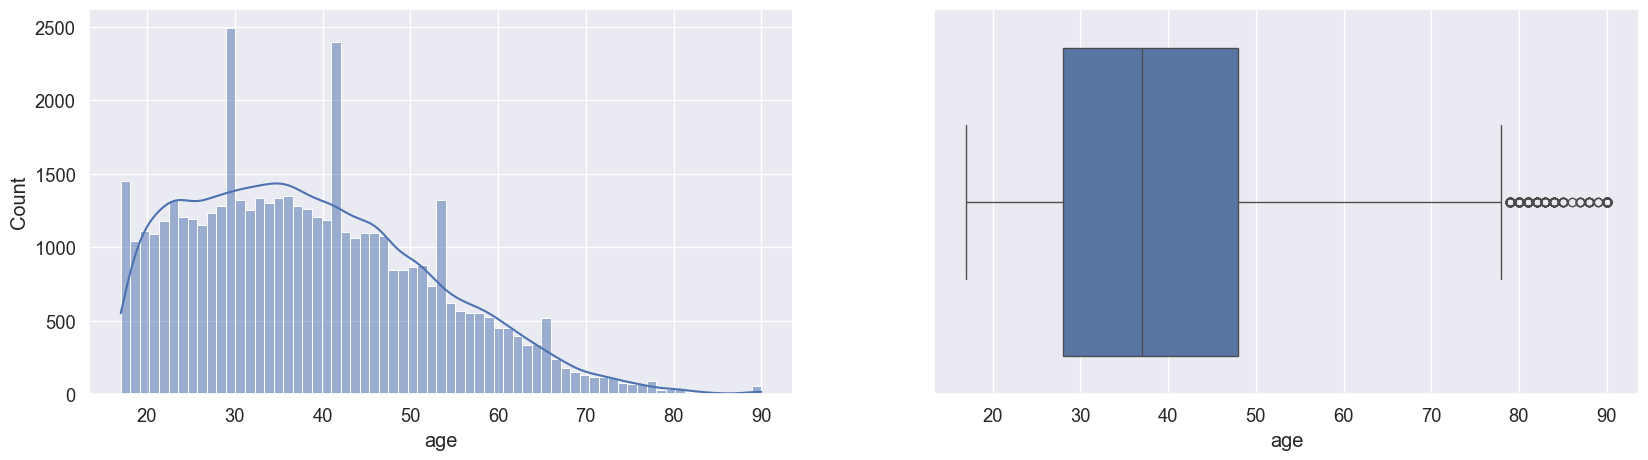

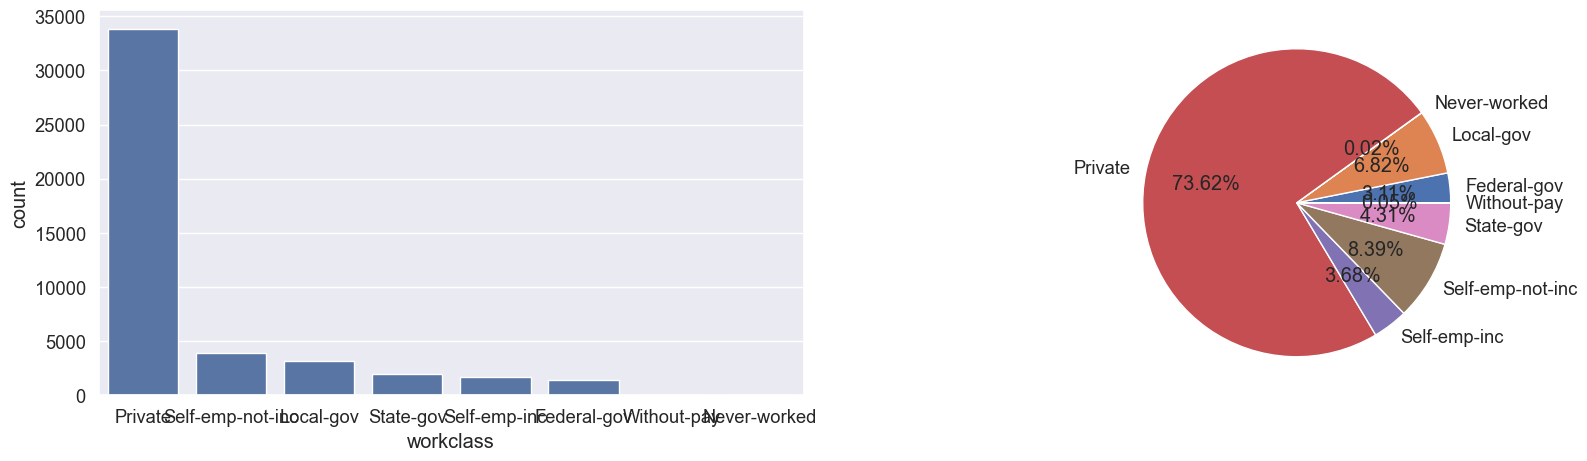

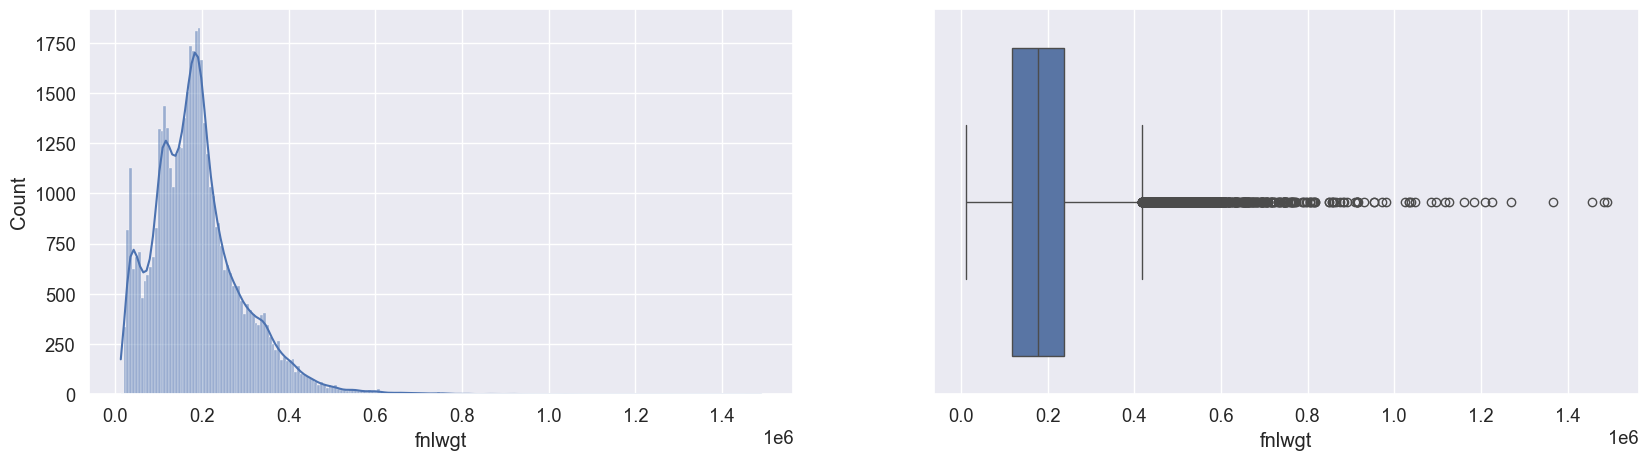

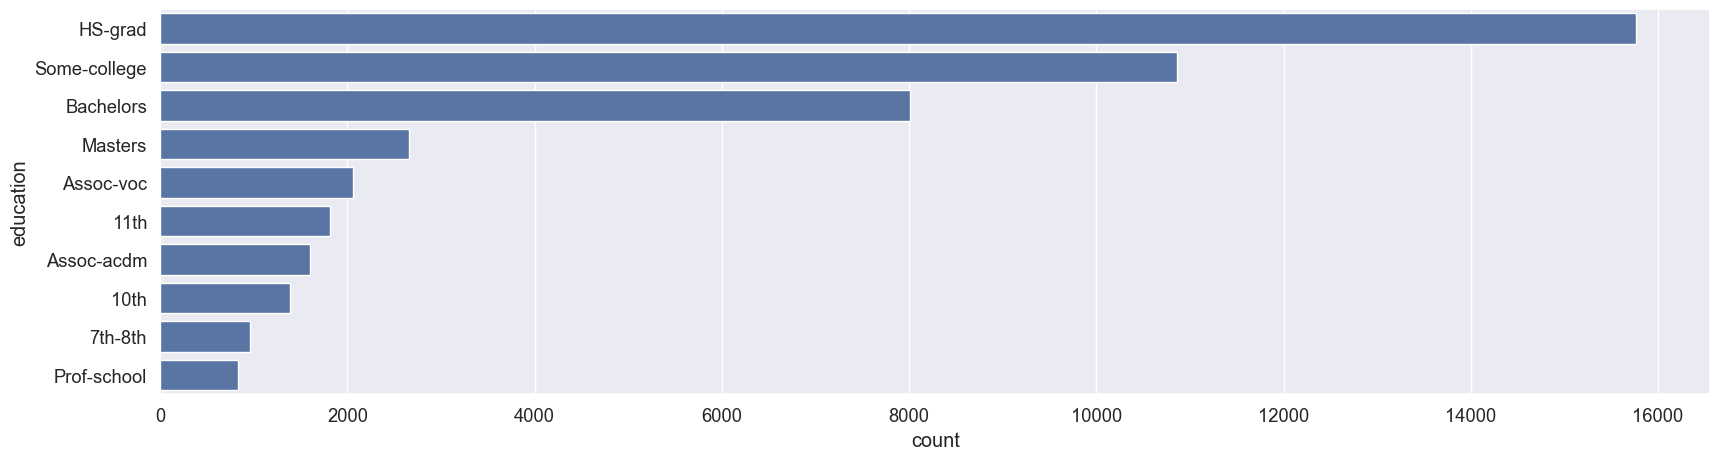

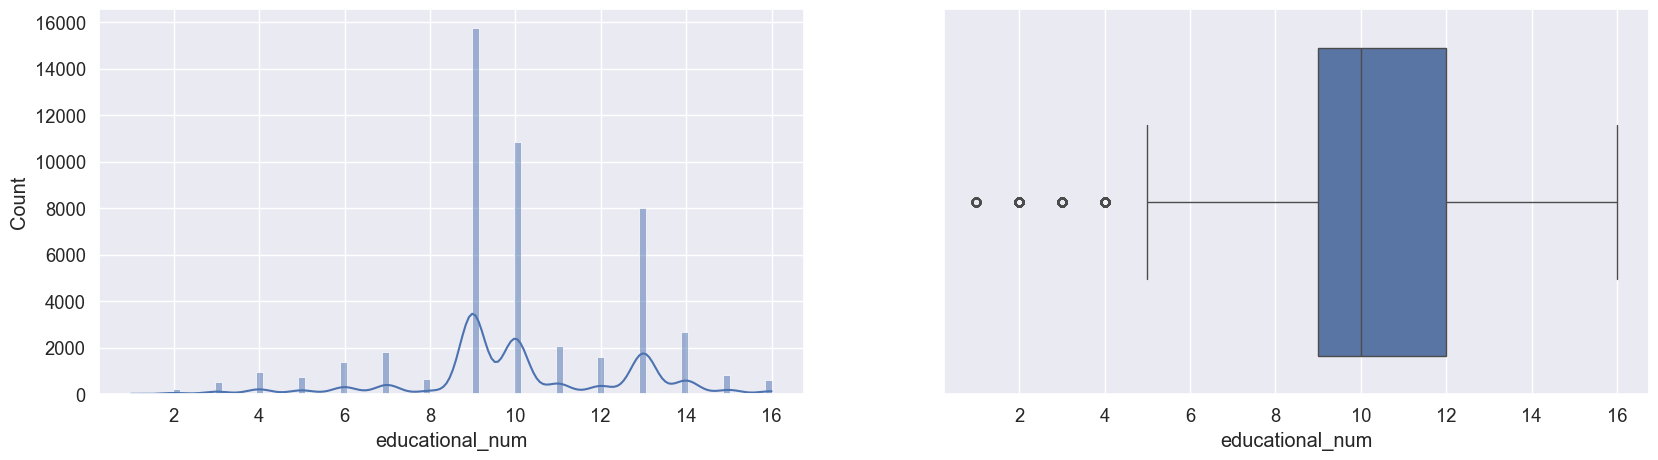

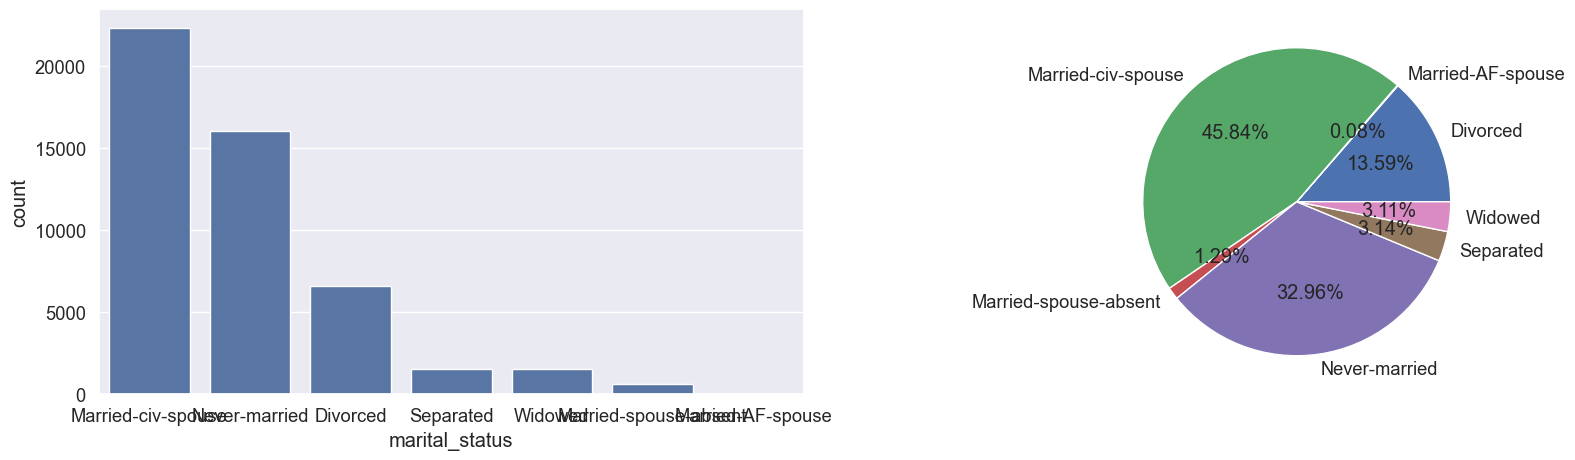

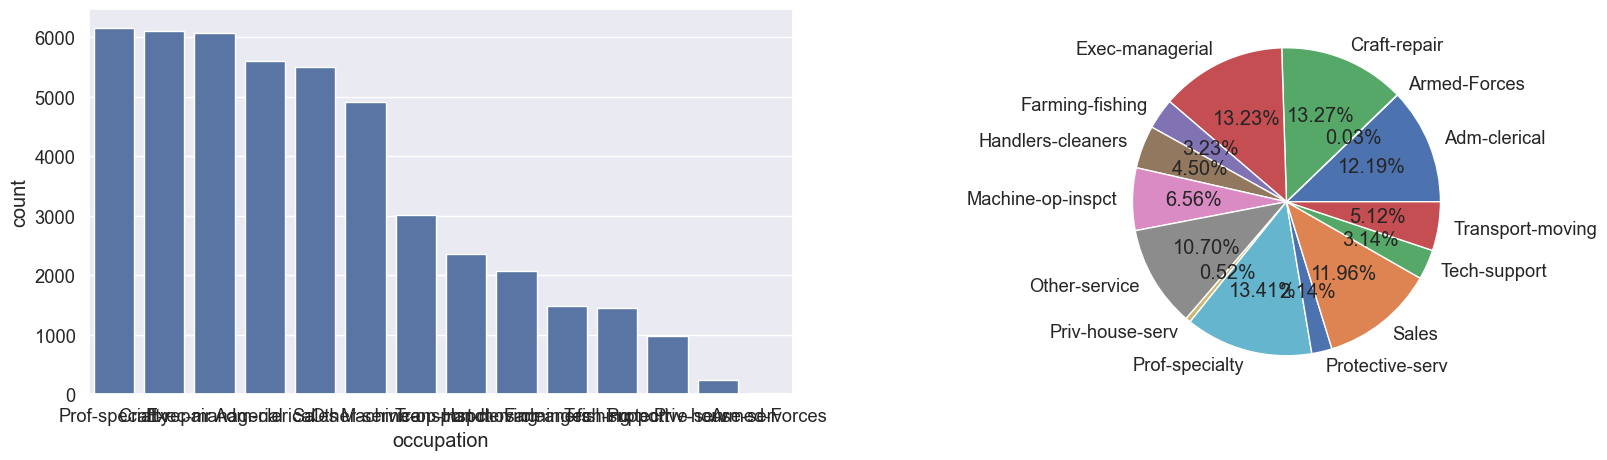

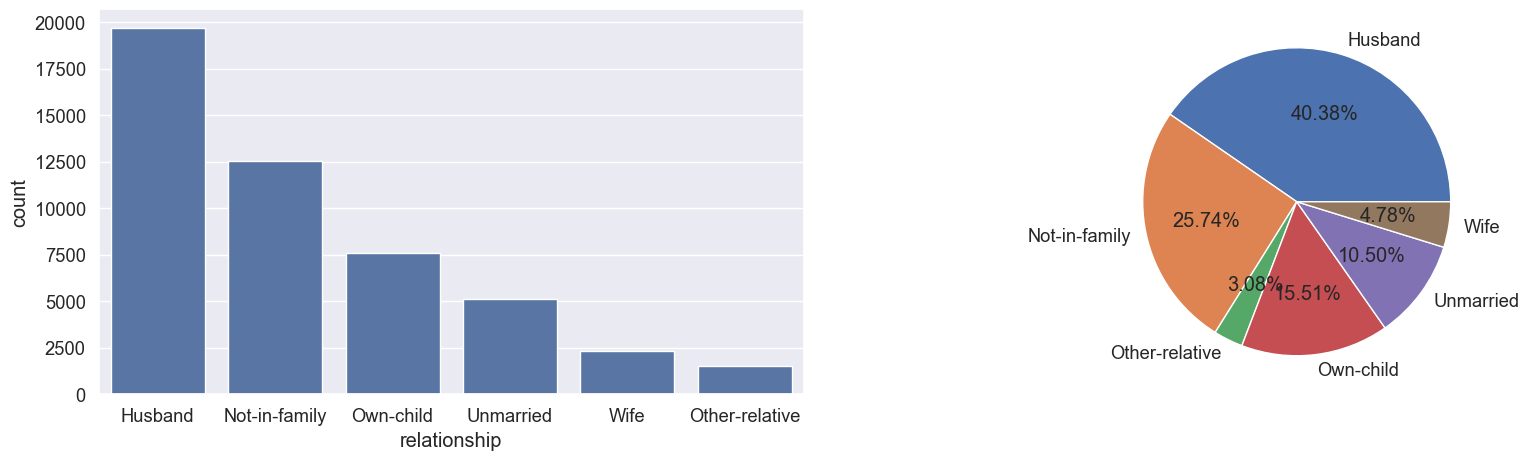

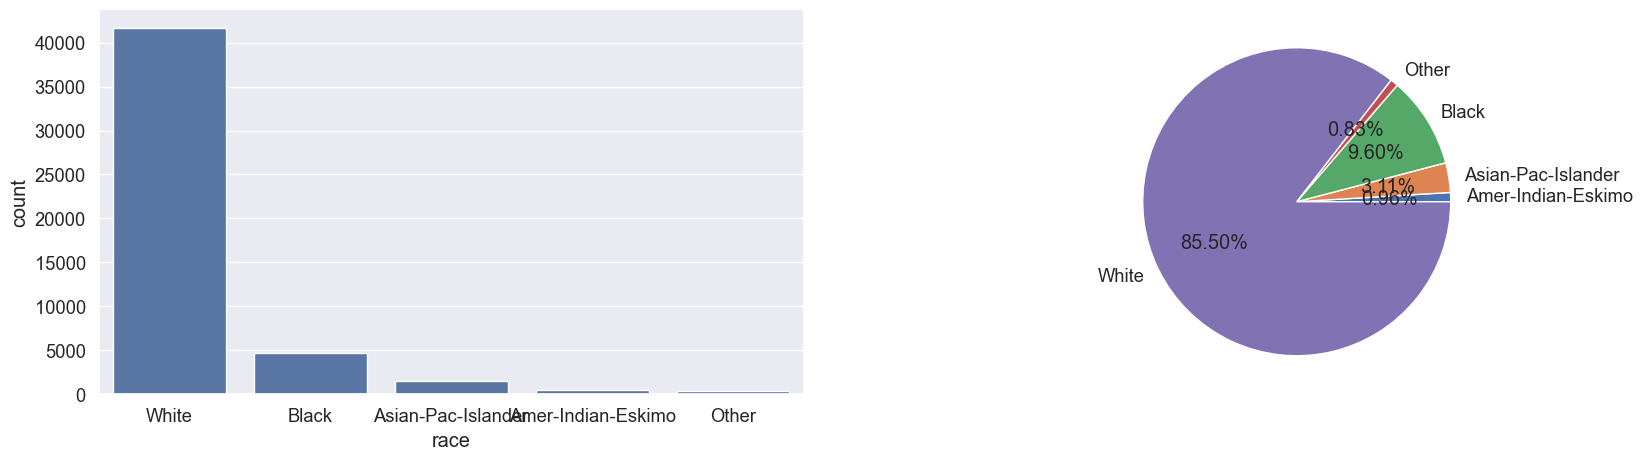

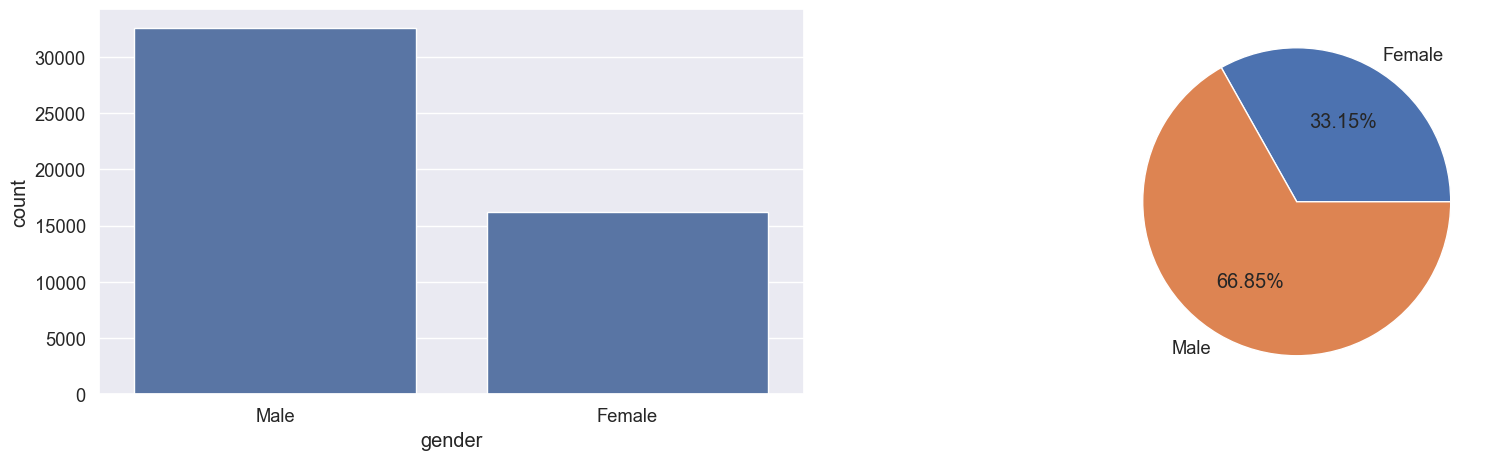

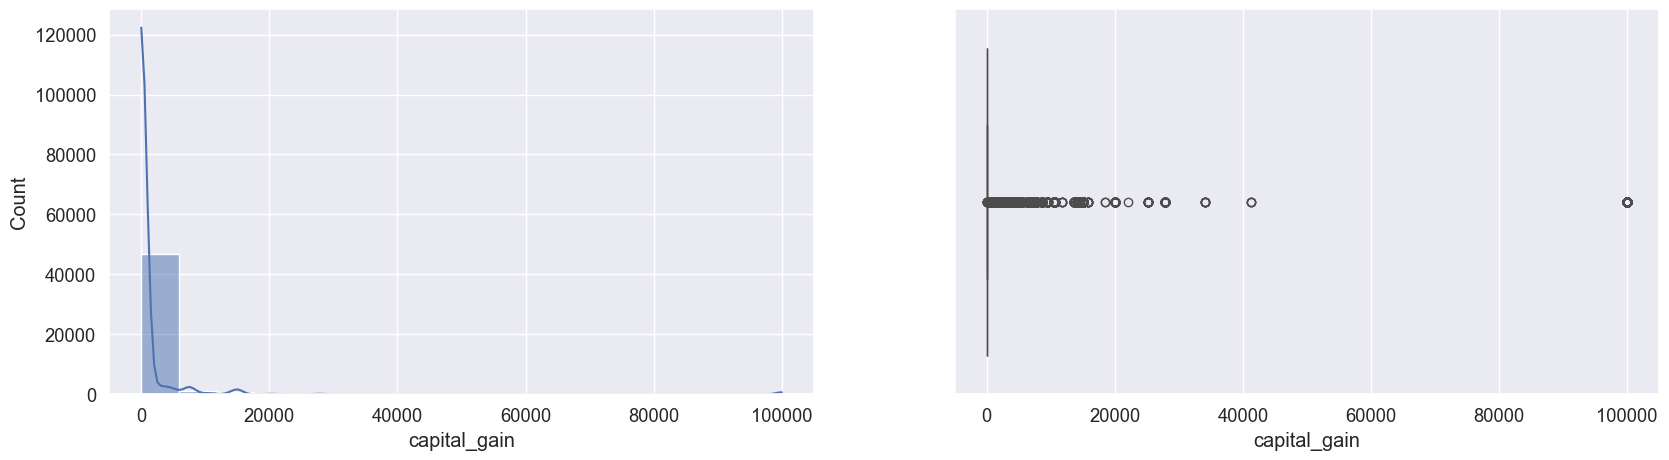

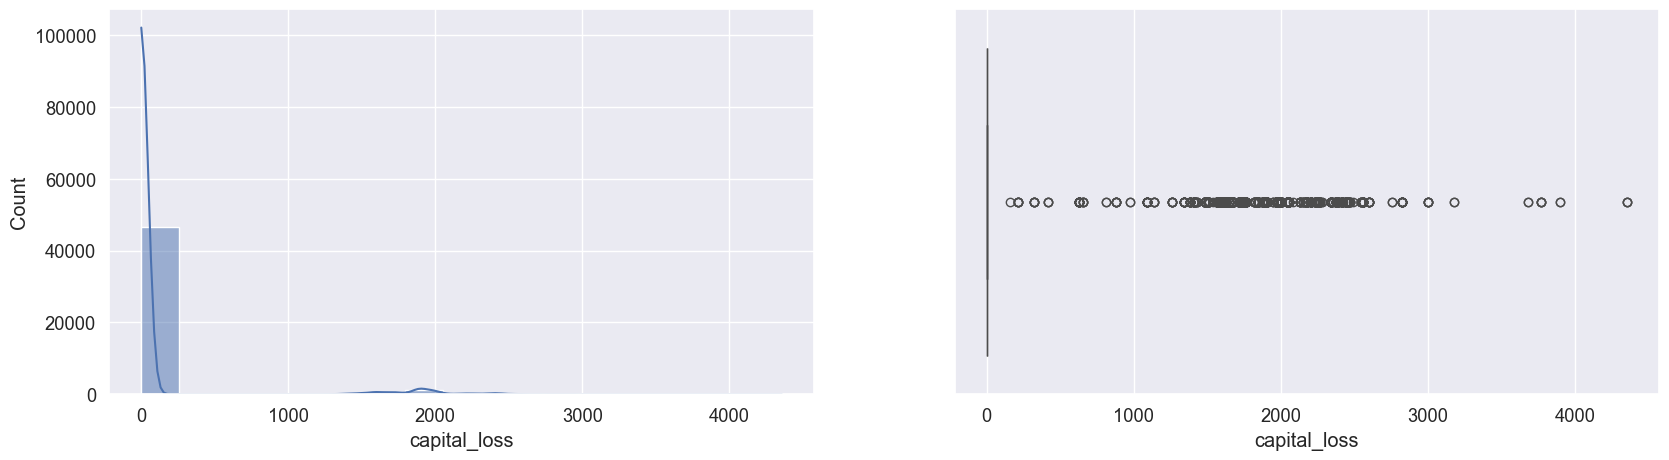

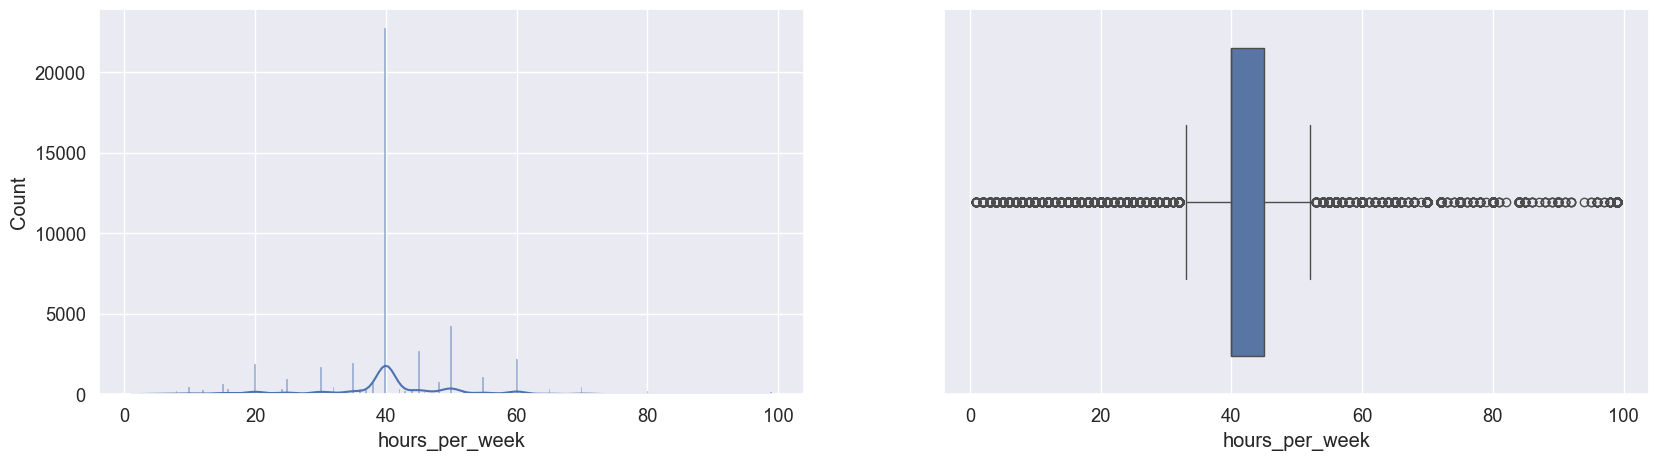

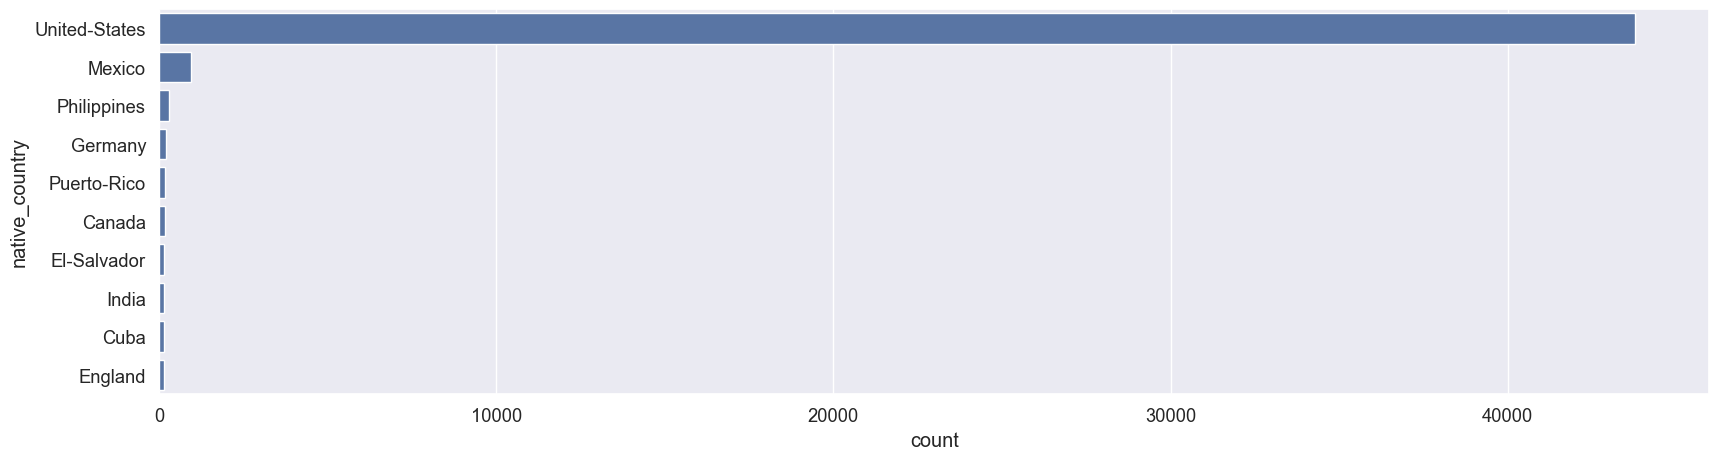

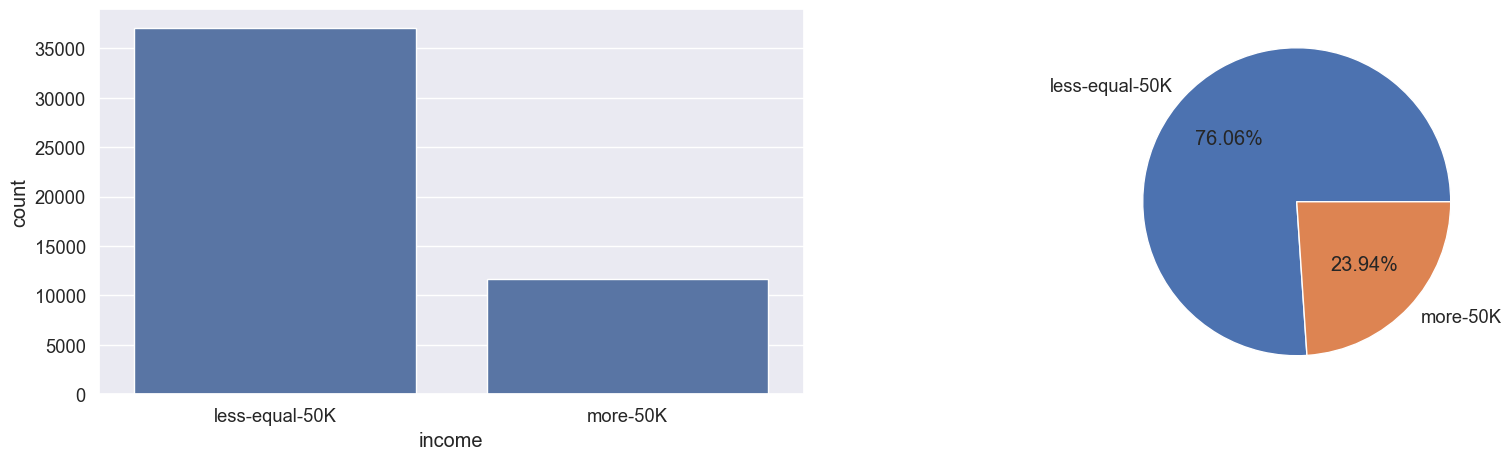

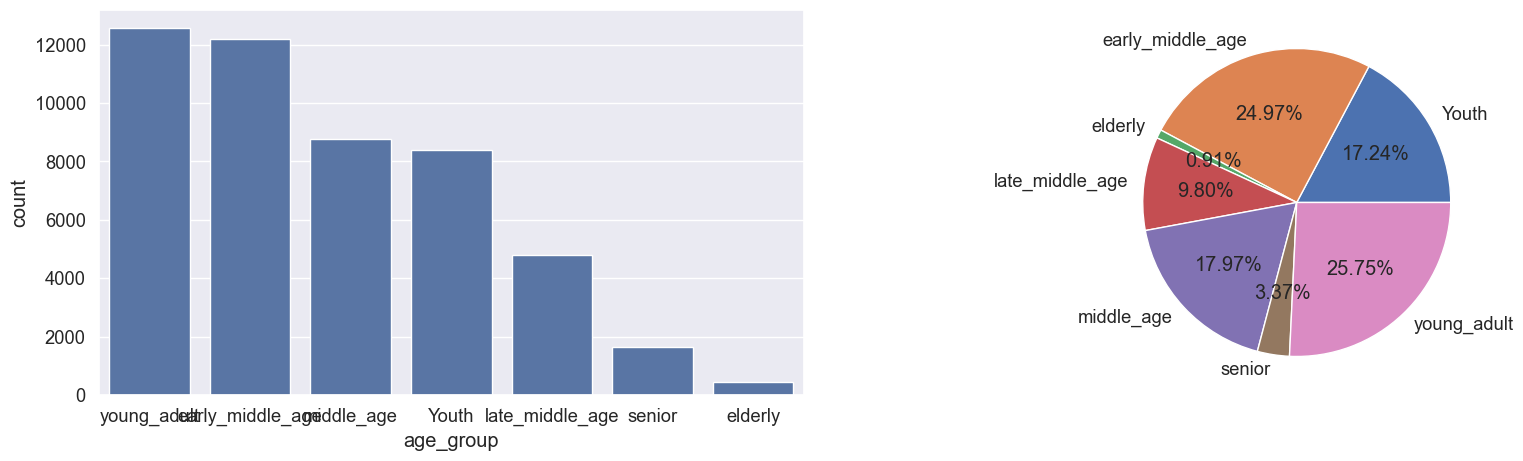

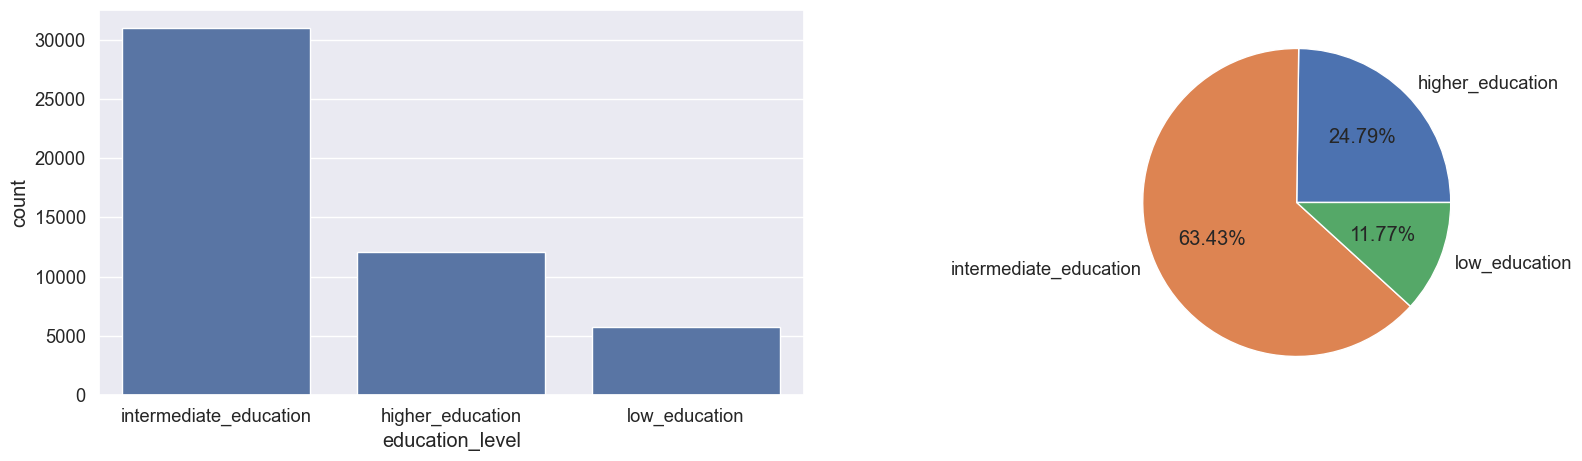

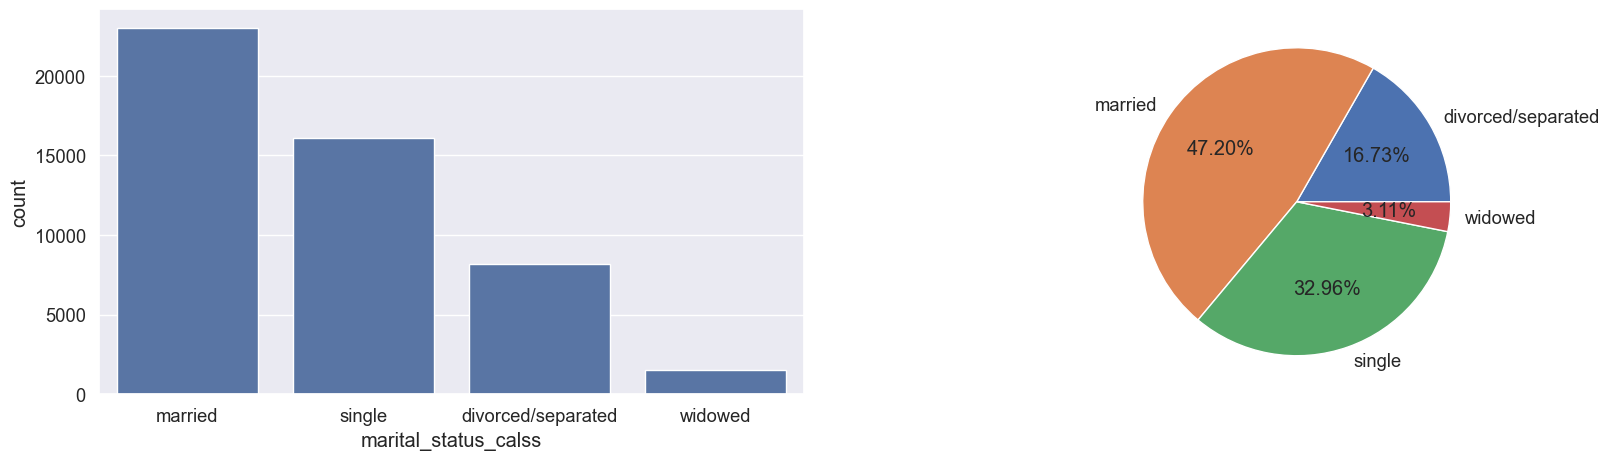

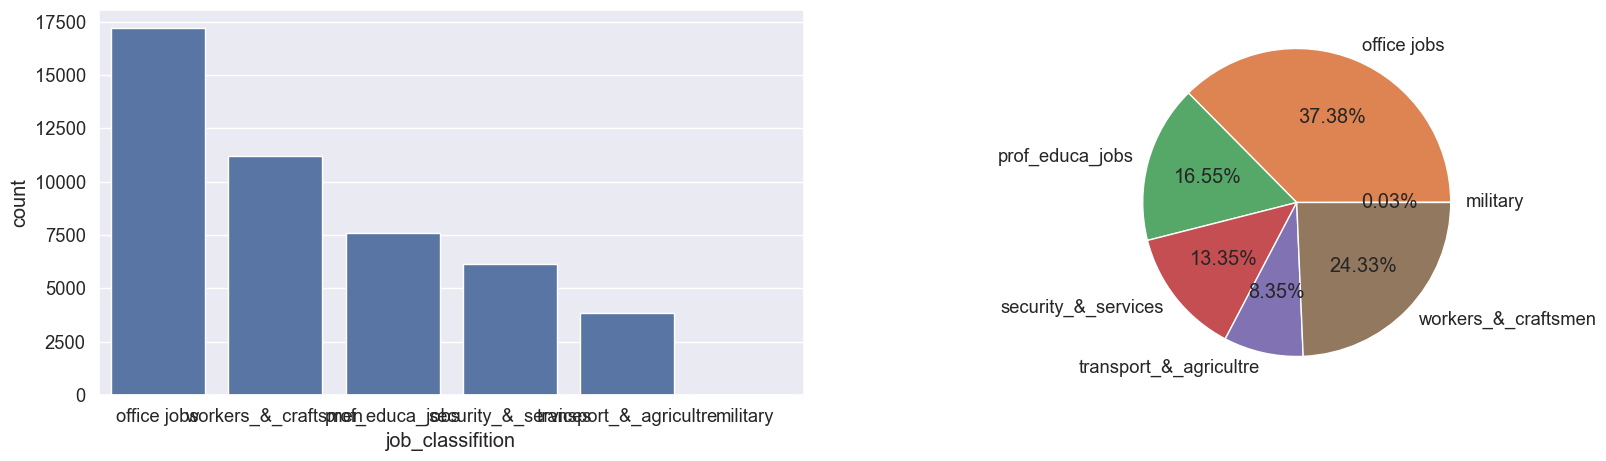

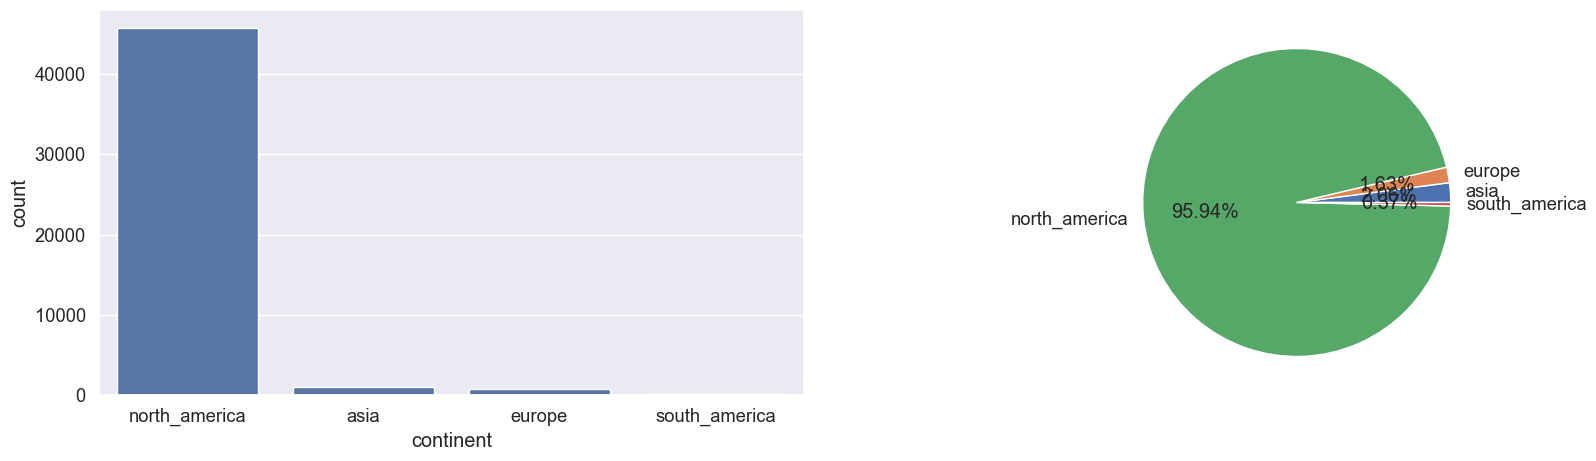

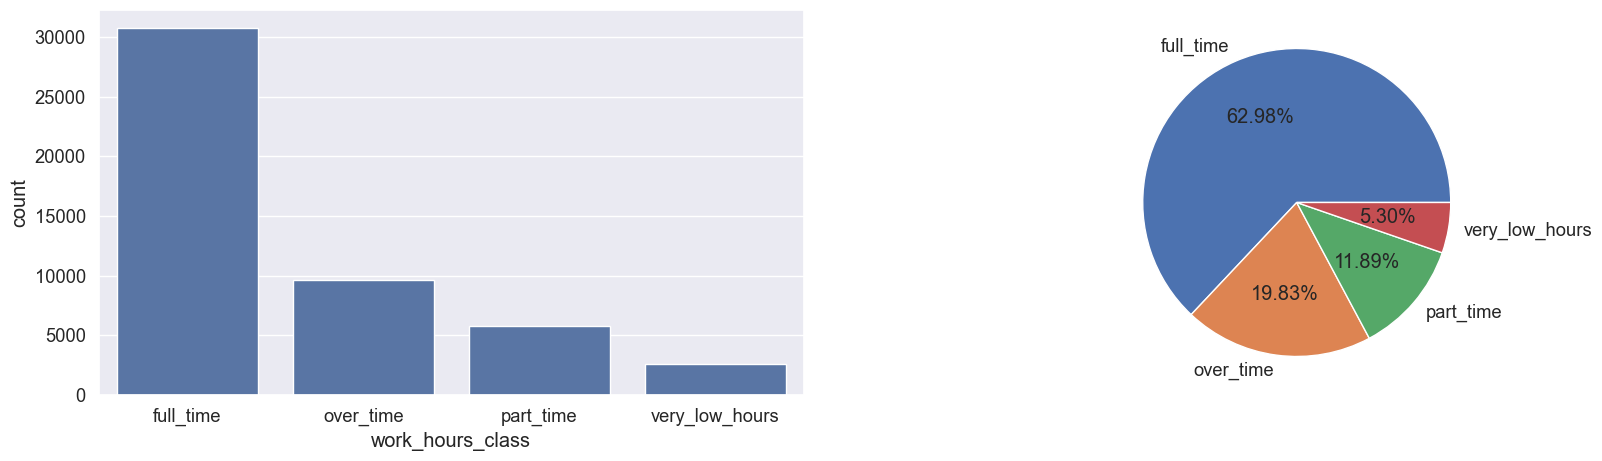

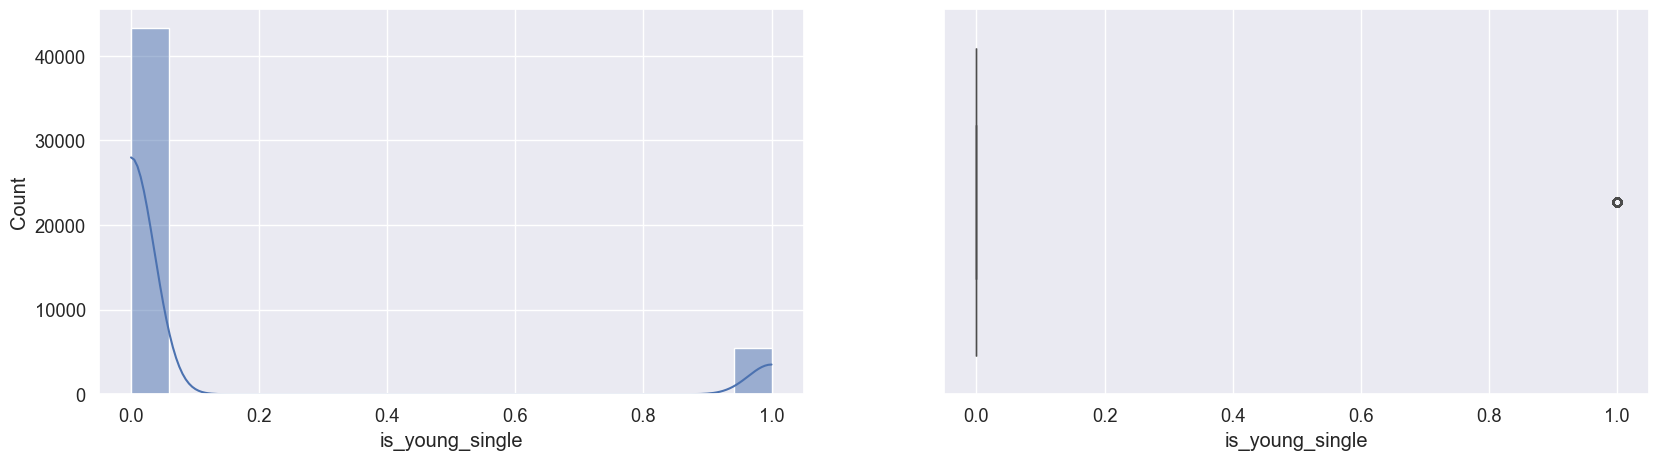

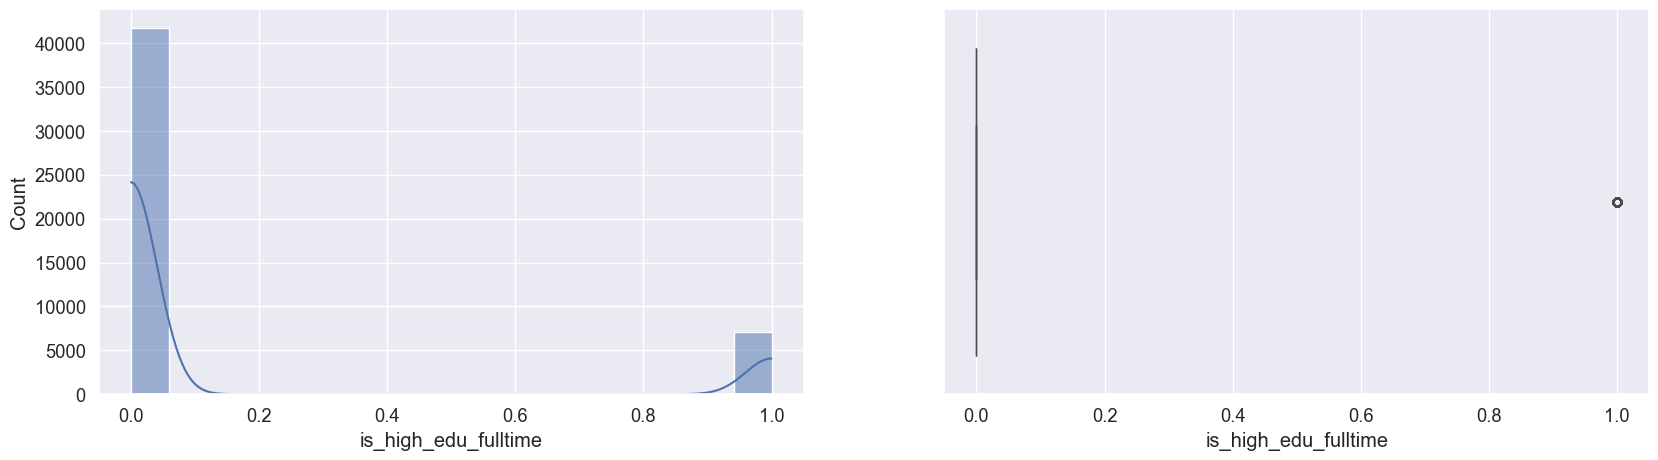

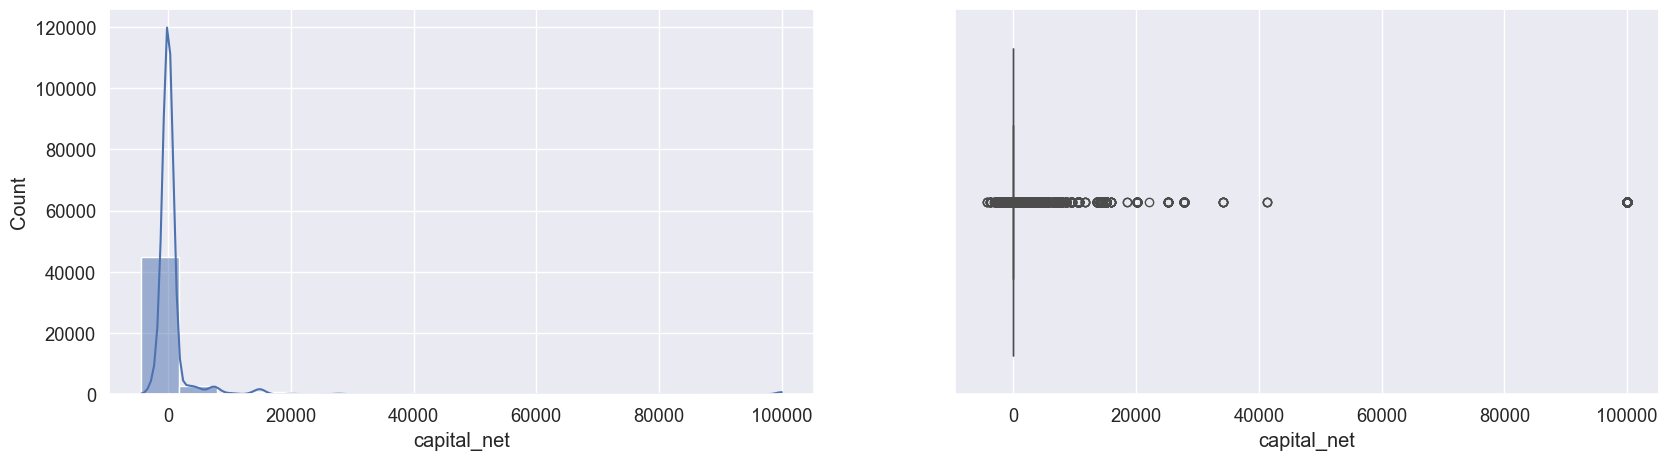

In [32]:
for col in df.columns:
    if col in df.select_dtypes('number').columns:
        fig,axes = plt.subplots(1,2)
        sns.histplot(x = df[col],kde=True,ax = axes[0])
        sns.boxplot(x = df[col],ax=axes[1])
    else:
        if df[col].nunique()<15:
            fig,axes = plt.subplots(1,2)
            dff = df.groupby(col).size().reset_index(name='count')
            sns.countplot(x = df[col],ax = axes[0],order=df[col].value_counts().index)
            plt.pie(dff['count'],labels=dff[col],autopct='%.2f%%')
        else :
            # sns.countplot(df[col],order=df[col].value_counts().index,ax=axes[0])
            dff = df.groupby(col)[['income']].count().reset_index().rename(columns={'income':'count'}).sort_values(by='count', ascending=False).head(10)
            sns.barplot(y=dff[col],x=dff['count'])
    plt.show()

In [33]:
# age               > Right-Skewed = log 
# education_num     > normal       =lu_up
#capital_loss&gaine > Right-Skewed = log 
#hours_per_week     > normal       = lu_up
# capital_net       > Right-Skewed = log 


# Analysis Questions

Text(0.5, 1.0, 'Income by Work Class')

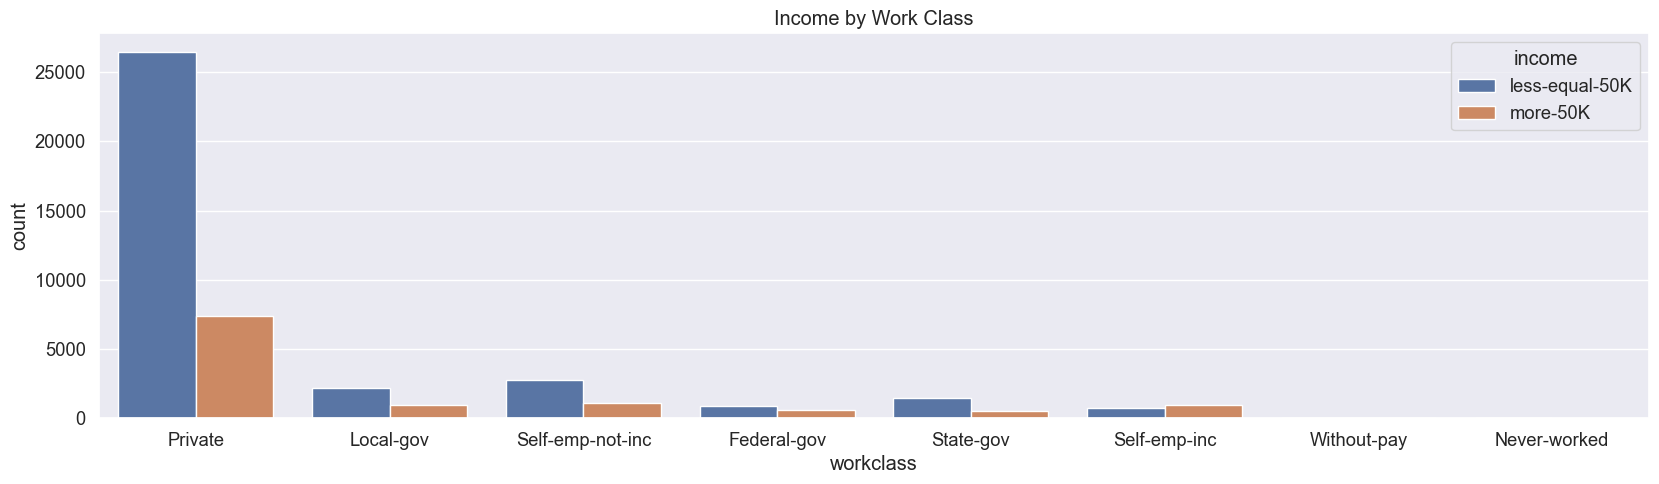

In [34]:
sns.countplot(x=df['workclass'],hue=df['income'])
plt.title('Income by Work Class')

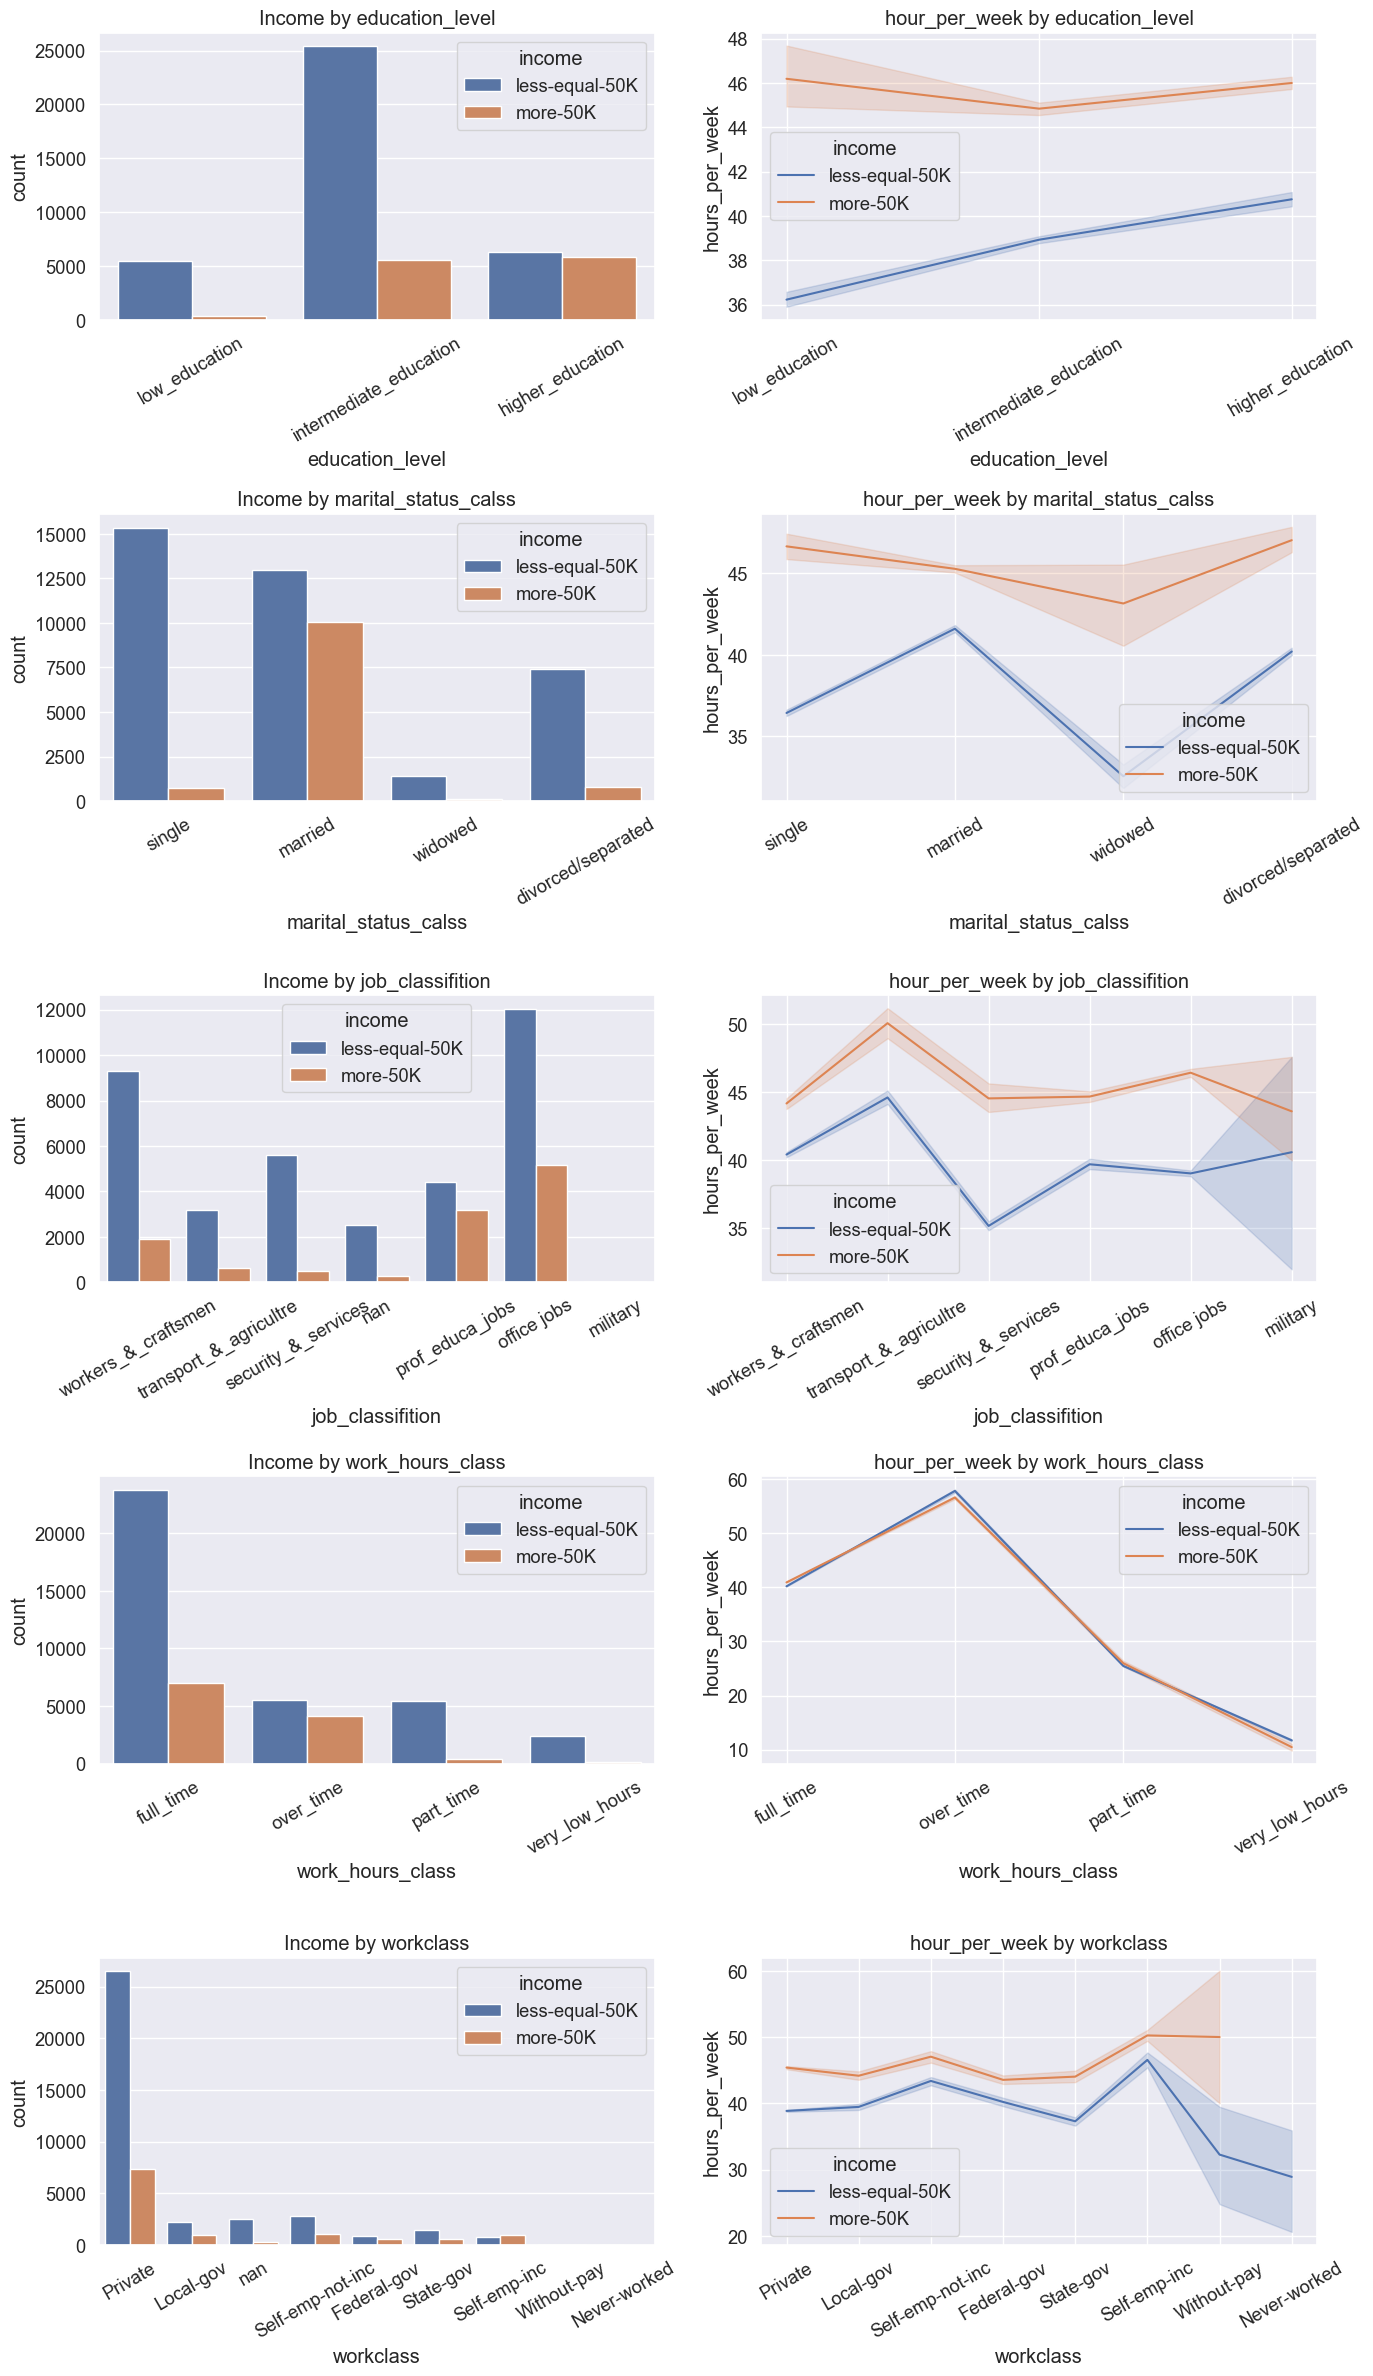

In [35]:
fig, axes = plt.subplots(5,2, figsize=(14,24))

cols = ['education_level','marital_status_calss','job_classifition','work_hours_class','workclass']
for i, col in enumerate(cols):
    sns.countplot(x=df[col].astype("str"),hue=df['income'], ax=axes[i,0])
    axes[i,0].set_title(f"Income by {col}")
    axes[i,0].tick_params(axis='x', rotation=30)

    sns.lineplot(x=df[col], y=df['hours_per_week'],hue=df['income'],ax=axes[i,1])
    axes[i,1].set_title(f"hour_per_week by {col}")
    axes[i,1].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

In [41]:
df['job_classifition'].value_counts()

office jobs               17189
workers_&_craftsmen       11189
prof_educa_jobs            7610
security_&_services        6141
transport_&_agricultre     3840
military                     15
Name: job_classifition, dtype: int64

In [35]:
# sns.heatmap(df.select_dtypes('number').corr(),annot=True)

# Pre-Processing

In [36]:
# train_test_split
X=df.drop('income',axis=1)
y=df['income']  
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42,shuffle=True,stratify=y)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((39031, 23), (39031,), (9758, 23), (9758,))

In [37]:
# Detect NaN
X_train.isna().mean()*100

age                     0.000000
workclass               5.728780
fnlwgt                  0.000000
education               0.000000
educational_num         0.000000
marital_status          0.000000
occupation              5.754400
relationship            0.000000
race                    0.000000
gender                  0.000000
capital_gain            0.000000
capital_loss            0.000000
hours_per_week          0.000000
native_country          1.749891
age_group               0.000000
education_level         0.000000
marital_status_calss    0.000000
job_classifition        5.754400
continent               2.326356
work_hours_class        0.000000
is_young_single         0.000000
is_high_edu_fulltime    0.000000
capital_net             0.000000
dtype: float64

In [38]:
# Handle NaN

# workclass        > mod
# occupation       > mod
# native_country   > mod
# job_classifition > mod
# continent        > mod

In [39]:
# Handle Outliers

# age                > Right-Skewed = lu_up 
# education_num      > normal       = lu_up
# capital_loss&gaine > Right-Skewed = log  
# hours_per_week     > normal       = lu_up 
# fnlwgt             > Right-Skewed = log
# capital_net       > Right-Skewed  = log_0

In [40]:
# Encoding 

# workclass             > BinaryEncoder
# education             > BinaryEncoder
# marital_status        > OneHotEncoding
# occupation            > BinaryEncoder
# relationship          > OneHotEncoding
# race                  > OneHotEncoding
# gender                > OneHotEncoding
# native_country        > BinaryEncoder
# age_group             > OneHotEncoding
# education_level       > OneHotEncoding
# marital_status_calss  > OneHotEncoding
# job_classifition      > OneHotEncoding
# continent             > OneHotEncoding

In [41]:
# Scaling

# age                    > StandardScaler
# fnlwgt                 > RobustScaler
# education_num          > StandardScaler
# capital_loss&gaine_net > RobustScaler
# hours_per_week         > StandardScaler

In [42]:
from sklearn.base import BaseEstimator, TransformerMixin
class LogTransfomer(BaseEstimator, TransformerMixin):
    def __init__(self,col):
        self.col=col

    def fit(self, X, y=None):
        self.n_features_in_ = X.shape[1]
        return self

    def transform(self, X, y=None):
        assert self.n_features_in_ == X.shape[1]
        return np.log1p(X)
    
    def get_feature_names_out(self,X,y=None):
        return self.col



In [43]:
from sklearn.base import BaseEstimator, TransformerMixin

class LogTransfomer_0(BaseEstimator, TransformerMixin):
    def __init__(self, col):
        self.col = col

    def fit(self, X, y=None):
        self.n_features_in_ = X.shape[1]
        return self

    def transform(self, X, y=None):
        assert self.n_features_in_ == X.shape[1]
        return np.sign(X) * np.log1p(np.abs(X))

    def get_feature_names_out(self, input_features=None):
        return self.col


In [44]:
class Handle_Ub_Lb(BaseEstimator, TransformerMixin):
    def __init__(self,col):
        self.col = col
    def fit(self, X, y=None):
        self.n_features_in_ = X.shape[1]
        q1 = np.percentile(X, 25)
        q2 = np.percentile(X, 50)
        q3 = np.percentile(X, 75)
        iqr = q3 - q1
        ub_train = q3 + 1.5 * iqr
        lb_train = q1 - 1.5 * iqr
        self.ub_train = ub_train
        self.lb_train = lb_train
        return self # must return it's self

    def transform(self, X, y=None):
        assert self.n_features_in_ == X.shape[1]
        X[X > self.ub_train] = self.ub_train
        X[X < self.lb_train] = self.lb_train
        return X
    def get_feature_names_out(self,X,y=None):
        return self.col


In [45]:

workclass_education_occupation_native_country=Pipeline(steps=[
    ('handle_nan',SimpleImputer(strategy='most_frequent')),
    ('BinaryEncoder',BinaryEncoder())
])
onh_colm_pib=Pipeline(steps=[
    ('handle_nan',SimpleImputer(strategy='most_frequent')),
    ('OneHotEncoder',OneHotEncoder(drop='first',sparse_output=False))
])
age_education_num_hours_per_week =Pipeline(steps=[
    ('handle_nan',SimpleImputer(strategy='median')),
    # ('poly', PolynomialFeatures(degree=5, include_bias=False)),
    ('handle_outliers',Handle_Ub_Lb(['age','educational_num','hours_per_week'])),
    ('scale',StandardScaler())
])
fnlwgt_capital_loss_gain=Pipeline(steps=[
    ('handle_nan',SimpleImputer(strategy='median')),
    ('handle_outliers',LogTransfomer(['fnlwgt','capital_gain','capital_loss'])),
    ('scale',RobustScaler())
])
is_young_single_is_high_edu_fulltime = Pipeline(steps=[
    ('handle_nan',SimpleImputer(strategy="constant", fill_value=0)),
    # ('poly', PolynomialFeatures(degree=5, include_bias=False)),
])
capital_net = Pipeline(steps=[
    ('handle_nan',SimpleImputer(strategy='median')),
    # ('poly', PolynomialFeatures(degree=5, include_bias=False)),
    ('handle_outliers',LogTransfomer_0(['capital_net'])),
    ('scale',RobustScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('workclass_education_occupation_native_country',workclass_education_occupation_native_country,['workclass','education','occupation','native_country']),
    ('onh_colm_pib',onh_colm_pib,['relationship','race','gender','education_level','marital_status_calss','job_classifition','continent','work_hours_class']),
    ('age_education_num_hours_per_week',age_education_num_hours_per_week,['age', 'educational_num','hours_per_week']),
    ('is_young_single_is_high_edu_fulltime',is_young_single_is_high_edu_fulltime,['is_young_single','is_high_edu_fulltime']),
    ('fnlwgt_capital_loss_gain',fnlwgt_capital_loss_gain,['fnlwgt','capital_gain', 'capital_loss']),
    ('capital_net',capital_net,['capital_net'])
])
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

feature_names = preprocessor.get_feature_names_out()
X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=feature_names)
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns=feature_names)


In [46]:
traget_pib=Pipeline(steps=[
    ('targit_encoding',OneHotEncoder(drop='first',sparse_output=False))
])
y_train_preprocessed=traget_pib.fit_transform(y_train.to_frame())
y_test_preprocessed=traget_pib.transform(y_test.to_frame())
y_train_preprocessed_df = pd.Series(y_train_preprocessed.flatten(),index=y_train.index)


 ### ________________________________________________________________________________________________________________________

### PCA

In [47]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.97, random_state=42) 
X_train_pca = pca.fit_transform(X_train_preprocessed_df) 
X_test_pca = pca.transform(X_test_preprocessed_df) 
X_train_pca.shape

(39031, 23)

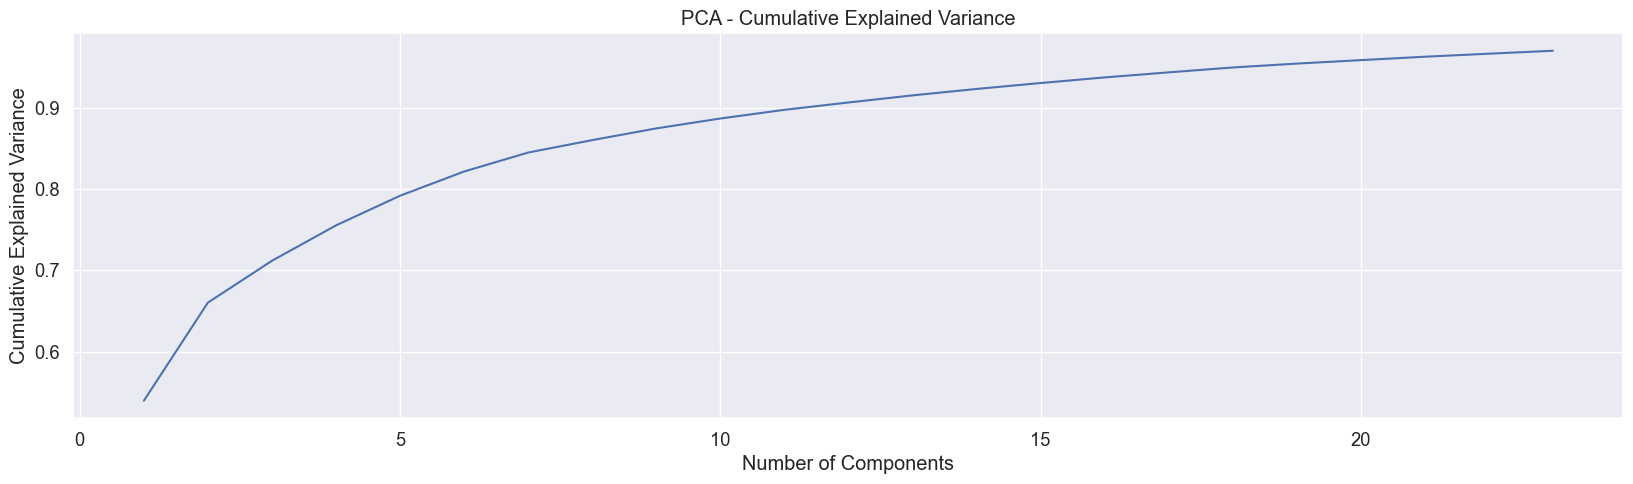

In [48]:
cumsum_var_ratio = np.cumsum(pca.explained_variance_ratio_)
dimensions = range(1, len(cumsum_var_ratio) + 1)

plt.plot(dimensions, cumsum_var_ratio)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Cumulative Explained Variance")
plt.grid(True)
plt.show()

In [49]:
component_1 = pca.components_[0]
feature_contributions = pd.Series(component_1, index=feature_names)
feature_contributions_sorted = feature_contributions.abs().sort_values(ascending=False)

print(feature_contributions_sorted)

capital_net__capital_net                                      0.783567
fnlwgt_capital_loss_gain__capital_gain                        0.587858
fnlwgt_capital_loss_gain__capital_loss                        0.195710
age_education_num_hours_per_week__age                         0.025844
age_education_num_hours_per_week__educational_num             0.023702
age_education_num_hours_per_week__hours_per_week              0.015890
onh_colm_pib__marital_status_calss_married                    0.011985
onh_colm_pib__marital_status_calss_single                     0.010121
workclass_education_occupation_native_country__2_0            0.008212
onh_colm_pib__education_level_intermediate_education          0.006904
onh_colm_pib__work_hours_class_over_time                      0.006710
onh_colm_pib__relationship_Own-child                          0.006069
onh_colm_pib__gender_Male                                     0.005707
onh_colm_pib__job_classifition_prof_educa_jobs                0.005026
workcl

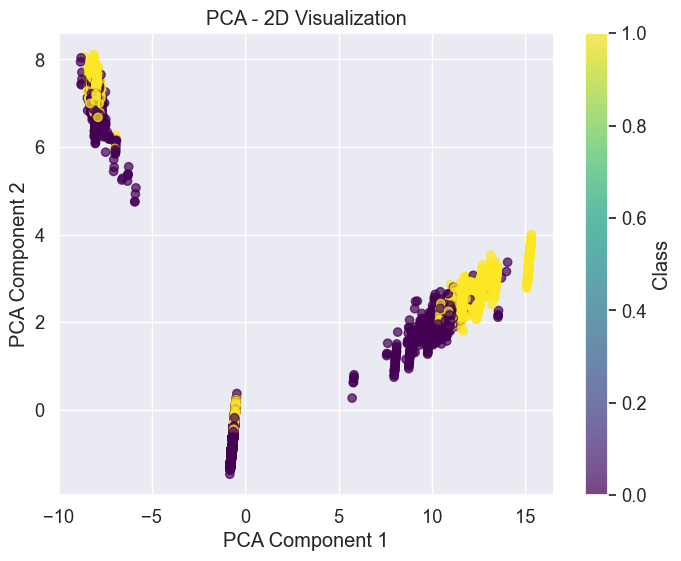

In [50]:
X_pca_2d = pca.transform(X_train_preprocessed_df)  
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y_train_preprocessed, cmap='viridis', alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA - 2D Visualization")
plt.colorbar(label='Class')
plt.show()

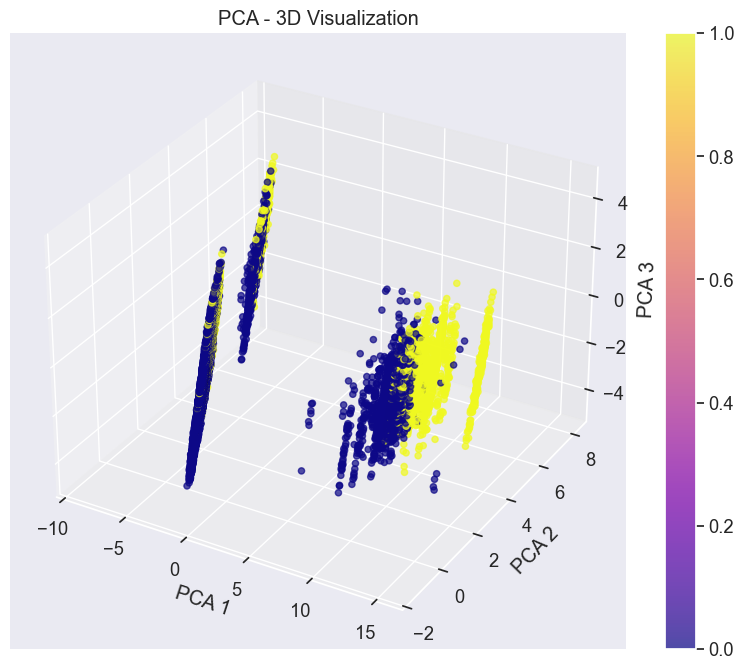

In [51]:
from mpl_toolkits.mplot3d import Axes3D

X_pca_3d = pca.transform(X_train_preprocessed_df)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y_train_preprocessed, cmap='plasma', alpha=0.7)
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.title('PCA - 3D Visualization')
plt.colorbar(sc)
plt.show()

# Modeling

In [52]:
# C > 1 :5
# ploy > 4:6
# l1_ratio > 7:8
from sklearn.linear_model import LogisticRegression
log_reg =LogisticRegression(penalty='elasticnet',l1_ratio=0.8,C=1, max_iter=100000, random_state=42, class_weight='balanced',solver='saga')
log_reg.fit(X_train_pca,y_train_preprocessed.ravel())

LogisticRegression(C=1, class_weight='balanced', l1_ratio=0.8, max_iter=100000,
                   penalty='elasticnet', random_state=42, solver='saga')

In [53]:


y_valid_pred = cross_val_predict(log_reg,X_train_pca,y_train_preprocessed.ravel(),cv=5)

print(f"Train Accuracy: {log_reg.score(X_train_pca, y_train_preprocessed.ravel())}")
valid_acc = cross_val_score(log_reg, X_train_pca, y_train_preprocessed.ravel(), cv=5, scoring='accuracy')
print(f'Valid Accuracy:{valid_acc.mean()}')

print(f"Valid Precision: {precision_score(y_train_preprocessed.ravel(), y_valid_pred)}")
print(f"Valid Recall: {recall_score(y_train_preprocessed.ravel(), y_valid_pred)}")
print(f"Valid F1: {f1_score(y_train_preprocessed.ravel(), y_valid_pred)}")
confusion_matrix(y_train_preprocessed.ravel(), y_valid_pred)

Train Accuracy: 0.7955727498654915
Valid Accuracy:0.7955214810965583
Valid Precision: 0.7423568029958227
Valid Recall: 0.8077976975849994
Valid F1: 0.7571662114593476


array([[23281,  6405],
       [ 1576,  7769]], dtype=int64)

 ### ________________________________________________________________________________________________________________________

In [54]:
from sklearn.svm import LinearSVC
lin_svc = LinearSVC(C=1,max_iter=10000,random_state=42,class_weight='balanced')
lin_svc.fit(X_train_pca,y_train_preprocessed.ravel())

LinearSVC(C=1, class_weight='balanced', max_iter=10000, random_state=42)

In [55]:
print(f"Train Accuracy: {lin_svc.score(X_train_pca, y_train_preprocessed.ravel())}")
valid_acc = cross_val_score(lin_svc, X_train_pca, y_train_preprocessed.ravel(), cv=5)
print(f'Valid Accuracy:{valid_acc.mean()}')

y_valid_pred = cross_val_predict(lin_svc,X_train_pca,y_train_preprocessed.ravel(),cv=5)

print(f"Valid Precision: {precision_score(y_train_preprocessed.ravel(), y_valid_pred)}")
print(f"Valid Recall: {recall_score(y_train_preprocessed.ravel(), y_valid_pred)}")
print(f"Valid F1: {f1_score(y_train_preprocessed.ravel(), y_valid_pred)}")
confusion_matrix(y_train_preprocessed.ravel(), y_valid_pred)

Train Accuracy: 0.790858548333376
Valid Accuracy:0.7907304490760162
Valid Precision: 0.7401855939200794
Valid Recall: 0.8086441782470326
Valid F1: 0.7538559138306931


array([[22985,  6701],
       [ 1467,  7878]], dtype=int64)

 ### ________________________________________________________________________________________________________________________

In [56]:
# from sklearn.svm import SVC
# svc_cla = SVC(C=.5,kernel='poly',degree=5,coef0=3,gamma='scale')
# svc_cla.fit(X_train_pca,y_train_preprocessed.ravel())

In [57]:
# print(f"Train Accuracy: {svc_cla.score(X_train_pca, y_train_preprocessed.ravel())}")
# valid_acc = cross_val_score(svc_cla, X_train_pca, y_train_preprocessed.ravel(), cv=2, scoring='accuracy')
# print(f'Valid Accuracy:{valid_acc.mean()}')

 ### ________________________________________________________________________________________________________________________

In [58]:
# n_neighbors > 5,8,10,15,18

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15,weights='uniform')
knn.fit(X_train_pca,y_train_preprocessed.ravel())

KNeighborsClassifier(n_neighbors=15)

In [59]:
print(f"Train Accuracy: {knn.score(X_train_pca, y_train_preprocessed.ravel())}")
valid_acc = cross_val_score(knn, X_train_pca, y_train_preprocessed.ravel(), cv=5)
print(f'Valid Accuracy:{valid_acc.mean()}')

y_valid_pred = cross_val_predict(knn,X_train_pca,y_train_preprocessed.ravel(),cv=5)

print(f"Valid Precision: {precision_score(y_train_preprocessed.ravel(), y_valid_pred)}")
print(f"Valid Recall: {recall_score(y_train_preprocessed.ravel(), y_valid_pred)}")
print(f"Valid F1: {f1_score(y_train_preprocessed.ravel(), y_valid_pred)}")
confusion_matrix(y_train_preprocessed.ravel(), y_valid_pred)

Train Accuracy: 0.8661576695447208
Valid Accuracy:0.8481208206395905
Valid Precision: 0.7952997532450171
Valid Recall: 0.775138927804619
Valid F1: 0.7842808420117457


array([[27168,  2518],
       [ 3410,  5935]], dtype=int64)

 ### ________________________________________________________________________________________________________________________

In [60]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB(priors=None, var_smoothing=1e-9)
naive_bayes.fit(X_train_pca,y_train_preprocessed.ravel())

GaussianNB()

In [61]:
print(f"Train Accuracy: {naive_bayes.score(X_train_pca, y_train_preprocessed.ravel())}")
valid_acc = cross_val_score(naive_bayes, X_train_pca, y_train_preprocessed.ravel(), cv=5)
print(f'Valid Accuracy:{valid_acc.mean()}')

y_valid_pred = cross_val_predict(naive_bayes,X_train_pca,y_train_preprocessed.ravel(),cv=5)

print(f"Valid Precision: {precision_score(y_train_preprocessed.ravel(), y_valid_pred)}")
print(f"Valid Recall: {recall_score(y_train_preprocessed.ravel(), y_valid_pred)}")
print(f"Valid F1: {f1_score(y_train_preprocessed.ravel(), y_valid_pred)}")
confusion_matrix(y_train_preprocessed.ravel(), y_valid_pred)

Train Accuracy: 0.812200558530399
Valid Accuracy:0.8122776582805507
Valid Precision: 0.7457358665296092
Valid Recall: 0.7027057303576254
Valid F1: 0.7188469684339887


array([[27102,  2584],
       [ 4743,  4602]], dtype=int64)

 ### ________________________________________________________________________________________________________________________

In [62]:
# Max_depth 10 : 15
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(criterion='gini',max_depth=10,random_state=42,class_weight='balanced')
dec_tree.fit(X_train_pca,y_train_preprocessed.ravel())

DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=42)

In [63]:
print(f"Train Accuracy: {dec_tree.score(X_train_pca, y_train_preprocessed.ravel())}")
valid_acc = cross_val_score(dec_tree, X_train_pca, y_train_preprocessed.ravel(), cv=5)
print(f'Valid Accuracy:{valid_acc.mean()}')

y_valid_pred = cross_val_predict(dec_tree,X_train_pca,y_train_preprocessed.ravel(),cv=5)

print(f"Valid Precision: {precision_score(y_train_preprocessed.ravel(), y_valid_pred)}")
print(f"Valid Recall: {recall_score(y_train_preprocessed.ravel(), y_valid_pred)}")
print(f"Valid F1: {f1_score(y_train_preprocessed.ravel(), y_valid_pred)}")
confusion_matrix(y_train_preprocessed.ravel(), y_valid_pred)

Train Accuracy: 0.8285209192692987
Valid Accuracy:0.7920883854372859
Valid Precision: 0.7397355693452197
Valid Recall: 0.8058340341769447
Valid F1: 0.7539772434498172


array([[23139,  6547],
       [ 1568,  7777]], dtype=int64)

 ### ________________________________________________________________________________________________________________________

## oversampling with PCA

In [64]:
# Logestic Regression

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []
all_y_train = []
all_y_pred = []

oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('PCA',PCA(n_components=0.97, random_state=42)),
    ('solve_imbalanced', SMOTE(k_neighbors=5, random_state=42)),
    ("model", LogisticRegression(penalty='elasticnet',l1_ratio=0.8,C=1, max_iter=100000, random_state=42,solver='saga'))
    ])
oversampling_pipeline.fit(X_train, y_train_preprocessed_df)
y_train_pred = oversampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train_preprocessed_df, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train_preprocessed_df):
    print(f"At fold {i}")
    
    oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('PCA',PCA(n_components=0.97, random_state=42)),
    ('solve_imbalanced', SMOTE(k_neighbors=5, random_state=42)),
    ("model", LogisticRegression(penalty='elasticnet',l1_ratio=0.8,C=1, max_iter=100000, random_state=42,solver='saga'))
    ])

    oversampling_pipeline.fit(X_train.iloc[train_indx], y_train_preprocessed_df.iloc[train_indx])
    y_valid_pred = oversampling_pipeline.predict(X_train.iloc[valid_indx])
    
    valid_accuracy_score.append(accuracy_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    all_y_train.extend(y_train_preprocessed_df.iloc[valid_indx])
    all_y_pred.extend(y_valid_pred)
    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") 
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") 
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") 
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") 
print(f'{confusion_matrix(all_y_train, all_y_pred)}')

Train Accuracy: 0.7971356101560299
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.7975967060313407
Average Valid F1 Score: 0.6627499763543355
Average Valid Precsion: 0.5513658126643254
Average Valid Recall: 0.8306046013911181
[[23369  6317]
 [ 1583  7762]]


 ### ________________________________________________________________________________________________________________________

In [65]:
# Linear SVC 

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []
all_y_train = []
all_y_pred = []

oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('PCA',PCA(n_components=0.97, random_state=42)),
    ('solve_imbalanced', SMOTE(k_neighbors=5, random_state=42)),
    ("model", LinearSVC(C=1,max_iter=10000,random_state=42))
    ])
oversampling_pipeline.fit(X_train, y_train_preprocessed_df)
y_train_pred = oversampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train_preprocessed_df, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train_preprocessed_df):
    print(f"At fold {i}")
    
    oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('PCA',PCA(n_components=0.97, random_state=42)),
    ('solve_imbalanced', SMOTE(k_neighbors=5, random_state=42)),
    ("model", LinearSVC(C=1,max_iter=10000,random_state=42))  
    ])

    oversampling_pipeline.fit(X_train.iloc[train_indx], y_train_preprocessed_df.iloc[train_indx])
    y_valid_pred = oversampling_pipeline.predict(X_train.iloc[valid_indx])
    
    valid_accuracy_score.append(accuracy_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    all_y_train.extend(y_train_preprocessed_df.iloc[valid_indx])
    all_y_pred.extend(y_valid_pred)
    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") 
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") 
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") 
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") 
print(f'{confusion_matrix(all_y_train, all_y_pred)}')

Train Accuracy: 0.7921908226794087
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.7924213345657295
Average Valid F1 Score: 0.6603339854599292
Average Valid Precsion: 0.5428768295499108
Average Valid Recall: 0.842696629213483
[[23054  6632]
 [ 1470  7875]]


 ### ________________________________________________________________________________________________________________________

In [66]:
# KNN

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []
all_y_train = []
all_y_pred = []

oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('PCA',PCA(n_components=0.97, random_state=42)),
    ('solve_imbalanced', SMOTE(k_neighbors=5, random_state=42)),
    ("model", KNeighborsClassifier(n_neighbors=15,weights='uniform'))
    ])
oversampling_pipeline.fit(X_train, y_train_preprocessed_df)
y_train_pred = oversampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train_preprocessed_df, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train_preprocessed_df):
    print(f"At fold {i}")
    
    oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('PCA',PCA(n_components=0.97, random_state=42)),
    ('solve_imbalanced', SMOTE(k_neighbors=5, random_state=42)),
    ("model", KNeighborsClassifier(n_neighbors=15,weights='uniform'))
    ])

    oversampling_pipeline.fit(X_train.iloc[train_indx], y_train_preprocessed_df.iloc[train_indx])
    y_valid_pred = oversampling_pipeline.predict(X_train.iloc[valid_indx])
    
    valid_accuracy_score.append(accuracy_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    all_y_train.extend(y_train_preprocessed_df.iloc[valid_indx])
    all_y_pred.extend(y_valid_pred)
    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") 
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") 
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") 
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") 
print(f'{confusion_matrix(all_y_train, all_y_pred)}')

Train Accuracy: 0.8130460403269196
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.7778944449657098
Average Valid F1 Score: 0.648276796112744
Average Valid Precsion: 0.5221631174719623
Average Valid Recall: 0.854788657035848
[[22374  7312]
 [ 1357  7988]]


 ### ________________________________________________________________________________________________________________________

In [67]:
# Decision Tree

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []
all_y_train = []
all_y_pred = []

oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('PCA',PCA(n_components=0.97, random_state=42)),
    ('solve_imbalanced', SMOTE(k_neighbors=5, random_state=42)),
    ("model",  DecisionTreeClassifier(criterion='gini',max_depth=10,random_state=42))
    ])
oversampling_pipeline.fit(X_train, y_train_preprocessed_df)
y_train_pred = oversampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train_preprocessed_df, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train_preprocessed_df):
    print(f"At fold {i}")
    
    oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('PCA',PCA(n_components=0.97, random_state=42)),
    ('solve_imbalanced', SMOTE(k_neighbors=5, random_state=42)),
    ("model",  DecisionTreeClassifier(criterion='gini',max_depth=10,random_state=42))
    ])

    oversampling_pipeline.fit(X_train.iloc[train_indx], y_train_preprocessed_df.iloc[train_indx])
    y_valid_pred = oversampling_pipeline.predict(X_train.iloc[valid_indx])
    
    valid_accuracy_score.append(accuracy_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    all_y_train.extend(y_train_preprocessed_df.iloc[valid_indx])
    all_y_pred.extend(y_valid_pred)
    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") 
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") 
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") 
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") 
print(f'{confusion_matrix(all_y_train, all_y_pred)}')

Train Accuracy: 0.8220132715021393
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.7884245732157109
Average Valid F1 Score: 0.6527577686314143
Average Valid Precsion: 0.537700595415896
Average Valid Recall: 0.8306046013911181
[[23011  6675]
 [ 1583  7762]]


##  undersampling with PCA

In [68]:
# Logestic Regression

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []
all_y_train = []
all_y_pred = []

undersampling_pip = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('PCA',PCA(n_components=0.97, random_state=42)),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", LogisticRegression(penalty='elasticnet',l1_ratio=0.8,C=1, max_iter=100000, random_state=42,solver='saga'))
    ])
undersampling_pip.fit(X_train, y_train_preprocessed_df)
y_train_pred = undersampling_pip.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train_preprocessed_df, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train_preprocessed_df):
    print(f"At fold {i}")
    
    undersampling_pip = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('PCA',PCA(n_components=0.97, random_state=42)),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", LogisticRegression(penalty='elasticnet',l1_ratio=0.8,C=1, max_iter=100000, random_state=42,solver='saga'))
    ])

    undersampling_pip.fit(X_train.iloc[train_indx], y_train_preprocessed_df.iloc[train_indx])
    y_valid_pred = undersampling_pip.predict(X_train.iloc[valid_indx])
    
    valid_accuracy_score.append(accuracy_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    all_y_train.extend(y_train_preprocessed_df.iloc[valid_indx])
    all_y_pred.extend(y_valid_pred)
    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") 
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") 
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") 
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") 
print(f'{confusion_matrix(all_y_train, all_y_pred)}')

Train Accuracy: 0.7954958878839896
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.7958032302550373
Average Valid F1 Score: 0.6621879316697885
Average Valid Precsion: 0.5483263477794831
Average Valid Recall: 0.8358480470840022
[[23250  6436]
 [ 1534  7811]]


 ### ________________________________________________________________________________________________________________________

In [69]:
# Linear SVC

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []
all_y_train = []
all_y_pred = []

undersampling_pip = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('PCA',PCA(n_components=0.97, random_state=42)),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", LinearSVC(C=1,max_iter=10000,random_state=42))
    ])
undersampling_pip.fit(X_train, y_train_preprocessed_df)
y_train_pred = undersampling_pip.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train_preprocessed_df, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train_preprocessed_df):
    print(f"At fold {i}")
    
    undersampling_pip = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('PCA',PCA(n_components=0.97, random_state=42)),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", LinearSVC(C=1,max_iter=10000,random_state=42))
    ])

    undersampling_pip.fit(X_train.iloc[train_indx], y_train_preprocessed_df.iloc[train_indx])
    y_valid_pred = undersampling_pip.predict(X_train.iloc[valid_indx])
    
    valid_accuracy_score.append(accuracy_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    all_y_train.extend(y_train_preprocessed_df.iloc[valid_indx])
    all_y_pred.extend(y_valid_pred)
    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") 
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") 
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") 
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") 
print(f'{confusion_matrix(all_y_train, all_y_pred)}')

Train Accuracy: 0.7904742384258666
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.7906279145806887
Average Valid F1 Score: 0.6598413349235537
Average Valid Precsion: 0.5399925263971083
Average Valid Recall: 0.8481540930979132
[[22933  6753]
 [ 1419  7926]]


 ### ________________________________________________________________________________________________________________________

In [70]:
# KNN

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []
all_y_train = []
all_y_pred = []

undersampling_pip = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('PCA',PCA(n_components=0.97, random_state=42)),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", KNeighborsClassifier(n_neighbors=15,weights='uniform')) 
    ])
undersampling_pip.fit(X_train, y_train_preprocessed_df)
y_train_pred = undersampling_pip.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train_preprocessed_df, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train_preprocessed_df):
    print(f"At fold {i}")
    
    undersampling_pip = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('PCA',PCA(n_components=0.97, random_state=42)),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", KNeighborsClassifier(n_neighbors=15,weights='uniform'))   
    ])

    undersampling_pip.fit(X_train.iloc[train_indx], y_train_preprocessed_df.iloc[train_indx])
    y_valid_pred = undersampling_pip.predict(X_train.iloc[valid_indx])
    
    valid_accuracy_score.append(accuracy_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    all_y_train.extend(y_train_preprocessed_df.iloc[valid_indx])
    all_y_pred.extend(y_valid_pred)
    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") 
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") 
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") 
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") 
print(f'{confusion_matrix(all_y_train, all_y_pred)}')

Train Accuracy: 0.7899874458763547
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.7725397374089049
Average Valid F1 Score: 0.6478463656743293
Average Valid Precsion: 0.5147823372395799
Average Valid Recall: 0.873836276083467
[[21987  7699]
 [ 1179  8166]]


 ### ________________________________________________________________________________________________________________________

In [71]:
# decision tree

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []
all_y_train = []
all_y_pred = []

undersampling_pip = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('PCA',PCA(n_components=0.97, random_state=42)),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model",  DecisionTreeClassifier(criterion='gini',max_depth=10,random_state=42))
    ])
undersampling_pip.fit(X_train, y_train_preprocessed_df)
y_train_pred = undersampling_pip.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train_preprocessed_df, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train_preprocessed_df):
    print(f"At fold {i}")
    
    undersampling_pip = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('PCA',PCA(n_components=0.97, random_state=42)),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model",  DecisionTreeClassifier(criterion='gini',max_depth=10,random_state=42))
    ])

    undersampling_pip.fit(X_train.iloc[train_indx], y_train_preprocessed_df.iloc[train_indx])
    y_valid_pred = undersampling_pip.predict(X_train.iloc[valid_indx])
    
    valid_accuracy_score.append(accuracy_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    all_y_train.extend(y_train_preprocessed_df.iloc[valid_indx])
    all_y_pred.extend(y_valid_pred)
    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") 
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") 
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") 
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") 
print(f'{confusion_matrix(all_y_train, all_y_pred)}')

Train Accuracy: 0.8120724552278957
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.7722579423046799
Average Valid F1 Score: 0.6393823978478015
Average Valid Precsion: 0.5149359073780302
Average Valid Recall: 0.8432316746923488
[[22262  7424]
 [ 1465  7880]]


 ### ________________________________________________________________________________________________________________________

## GridSearchCV_Oversampling

In [72]:
# Logestic Regression

params_grid = {
                'model__C':[4,3,2,1,3.5,1.5],
                'model__l1_ratio':[1,.7,.8,.9,.77],
                }



oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('PCA',PCA(n_components=0.97, random_state=42)),
    ('solve_imbalanced', SMOTE(k_neighbors=5, random_state=42)),
    ("model", LogisticRegression(penalty='elasticnet',l1_ratio=0.8,C=1, max_iter=100000, random_state=42,solver='saga')) 
    ])

logestic_grid_over = GridSearchCV(oversampling_pipeline, params_grid, cv=5, n_jobs=-1, scoring='f1') 

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []
all_y_train = []
all_y_pred = []

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train_preprocessed_df): 
    print(f"At fold {i}")


    logestic_grid_over.fit(X_train.iloc[train_indx], y_train_preprocessed_df.iloc[train_indx]) 
    y_valid_pred = logestic_grid_over.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    all_y_train.extend(y_train_preprocessed_df.iloc[valid_indx])
    all_y_pred.extend(y_valid_pred)

    i += 1



print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") 
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") 
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") 
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") 
print(f'{confusion_matrix(all_y_train, all_y_pred)}')

At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.7975967060313407
Average Valid F1 Score: 0.6627499763543355
Average Valid Precsion: 0.5513658126643254
Average Valid Recall: 0.8306046013911181
[[23369  6317]
 [ 1583  7762]]


In [73]:
logestic_grid_over.best_params_

{'model__C': 1, 'model__l1_ratio': 1}

In [74]:
logestic_grid_over.best_score_

0.6619705794978581

 ### ________________________________________________________________________________________________________________________

In [75]:
# Linear_svc
params_grid = {
                'model__C':[.002,.1,.02],
                }



oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('PCA',PCA(n_components=0.97, random_state=42)),
    ('solve_imbalanced', SMOTE(k_neighbors=5, random_state=42)),
    ("model", LinearSVC(C=1,max_iter=10000,random_state=42))    
    ])

lin_svc_grid_over = GridSearchCV(oversampling_pipeline, params_grid, cv=5, n_jobs=-1, scoring='f1') 

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []
all_y_train = []
all_y_pred = []

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train_preprocessed_df): 
    print(f"At fold {i}")


    lin_svc_grid_over.fit(X_train.iloc[train_indx], y_train_preprocessed_df.iloc[train_indx]) 
    y_valid_pred = lin_svc_grid_over.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    all_y_train.extend(y_train_preprocessed_df.iloc[valid_indx])
    all_y_pred.extend(y_valid_pred)

    i += 1



print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") 
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") 
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") 
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") 
print(f'{confusion_matrix(all_y_train, all_y_pred)}')

At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.7923188525798258
Average Valid F1 Score: 0.6604518787176511
Average Valid Precsion: 0.5426833527025738
Average Valid Recall: 0.8435527019796683
[[23042  6644]
 [ 1462  7883]]


In [76]:
lin_svc_grid_over.best_params_

{'model__C': 0.002}

In [77]:
lin_svc_grid_over.best_score_

0.660098854104193

 ### ________________________________________________________________________________________________________________________

In [78]:
# KNN 
params_grid = {
                'model__n_neighbors':[15,16,17,18],
                }



oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('PCA',PCA(n_components=0.97, random_state=42)),
    ('solve_imbalanced', SMOTE(k_neighbors=5, random_state=42)),
    ("model", KNeighborsClassifier(n_neighbors=15,weights='uniform'))
    ])

KNN_grid_over = GridSearchCV(oversampling_pipeline, params_grid, cv=5, n_jobs=-1, scoring='f1') 

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []
all_y_train = []
all_y_pred = []

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train_preprocessed_df): 
    print(f"At fold {i}")


    KNN_grid_over.fit(X_train.iloc[train_indx], y_train_preprocessed_df.iloc[train_indx]) 
    y_valid_pred = KNN_grid_over.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    all_y_train.extend(y_train_preprocessed_df.iloc[valid_indx])
    all_y_pred.extend(y_valid_pred)

    i += 1



print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") 
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") 
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") 
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") 
print(f'{confusion_matrix(all_y_train, all_y_pred)}')

At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.7867336549076078
Average Valid F1 Score: 0.6547971626470138
Average Valid Precsion: 0.5346078047589753
Average Valid Recall: 0.8447298020331729
[[22813  6873]
 [ 1451  7894]]


In [79]:
KNN_grid_over.best_params_

{'model__n_neighbors': 18}

In [80]:
KNN_grid_over.best_score_

0.6536010820503515

 ### ________________________________________________________________________________________________________________________

In [81]:
# dec_tree
params_grid = {
                'model__max_depth': [10,9,8,7,6,5,3,2,1],
                }



oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('PCA',PCA(n_components=0.97, random_state=42)),
    ('solve_imbalanced', SMOTE(k_neighbors=5, random_state=42)),
    ("model", DecisionTreeClassifier(criterion='gini',max_depth=10,random_state=42))
    ])

dec_tree_grid_over = GridSearchCV(oversampling_pipeline, params_grid, cv=5, n_jobs=-1, scoring='f1') 

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []
all_y_train = []
all_y_pred = []

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train_preprocessed_df): 
    print(f"At fold {i}")


    dec_tree_grid_over.fit(X_train.iloc[train_indx], y_train_preprocessed_df.iloc[train_indx]) 
    y_valid_pred = dec_tree_grid_over.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    all_y_train.extend(y_train_preprocessed_df.iloc[valid_indx])
    all_y_pred.extend(y_valid_pred)

    i += 1



print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") 
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") 
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") 
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") 
print(f'{confusion_matrix(all_y_train, all_y_pred)}')

At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.7878350663248171
Average Valid F1 Score: 0.6530603671284902
Average Valid Precsion: 0.5371200525969009
Average Valid Recall: 0.8336008560727661
[[22960  6726]
 [ 1555  7790]]


In [82]:
dec_tree_grid_over.best_params_

{'model__max_depth': 8}

In [83]:
dec_tree_grid_over.best_score_

0.6573380937894686

 ### ________________________________________________________________________________________________________________________

## GridSearchCV_Undersampling

In [84]:
# Logestic Regression

params_grid = {
                'model__C':[14,20,25],
                'model__l1_ratio':[1,.7,.8,.9,.77,.5,.4,.3,.1],
                }



undersampling_pip = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('PCA',PCA(n_components=0.97, random_state=42)),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model",  LogisticRegression(penalty='elasticnet',l1_ratio=0.3,C=25, max_iter=100000, random_state=42,solver='saga'))
    ])

logestic_grid_under = GridSearchCV(undersampling_pip, params_grid, cv=5, n_jobs=-1, scoring='f1') 

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []
all_y_train = []
all_y_pred = []

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train_preprocessed_df): 
    print(f"At fold {i}")


    logestic_grid_under.fit(X_train.iloc[train_indx], y_train_preprocessed_df.iloc[train_indx]) 
    y_valid_pred = logestic_grid_under.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    all_y_train.extend(y_train_preprocessed_df.iloc[valid_indx])
    all_y_pred.extend(y_valid_pred)

    i += 1



print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") 
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") 
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") 
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") 
print(f'{confusion_matrix(all_y_train, all_y_pred)}')

At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.7957263630223912
Average Valid F1 Score: 0.6621294101946764
Average Valid Precsion: 0.5481998709643041
Average Valid Recall: 0.8359550561797754
[[23246  6440]
 [ 1533  7812]]


In [85]:
logestic_grid_under.best_params_

{'model__C': 25, 'model__l1_ratio': 0.3}

In [86]:
logestic_grid_under.best_score_

0.6609290972268748

 ### ________________________________________________________________________________________________________________________

In [87]:
# Linear_svc
params_grid = {
                'model__C':[.002,.1,.02],
                }



undersampling_pip = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('PCA',PCA(n_components=0.97, random_state=42)),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model",  LinearSVC(C=1,max_iter=10000,random_state=42))
    ])

lin_svc_grid_under = GridSearchCV(undersampling_pip, params_grid, cv=5, n_jobs=-1, scoring='f1') 

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []
all_y_train = []
all_y_pred = []

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train_preprocessed_df): 
    print(f"At fold {i}")


    lin_svc_grid_under.fit(X_train.iloc[train_indx], y_train_preprocessed_df.iloc[train_indx]) 
    y_valid_pred = lin_svc_grid_under.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    all_y_train.extend(y_train_preprocessed_df.iloc[valid_indx])
    all_y_pred.extend(y_valid_pred)

    i += 1



print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") 
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") 
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") 
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") 
print(f'{confusion_matrix(all_y_train, all_y_pred)}')

At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.7906022932637532
Average Valid F1 Score: 0.6600421443353409
Average Valid Precsion: 0.5399164740546084
Average Valid Recall: 0.8490101658640985
[[22924  6762]
 [ 1411  7934]]


In [88]:
lin_svc_grid_under.best_params_

{'model__C': 0.02}

In [89]:
lin_svc_grid_under.best_score_

0.6591209436216185

 ### ________________________________________________________________________________________________________________________

In [90]:
# KNN 
params_grid = {
                'model__n_neighbors':[15,16,17,18],
                }



undersampling_pip = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('PCA',PCA(n_components=0.97, random_state=42)),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model",  KNeighborsClassifier(n_neighbors=15,weights='uniform'))
    ])

KNN_grid_under = GridSearchCV(undersampling_pip, params_grid, cv=5, n_jobs=-1, scoring='f1') 

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []
all_y_train = []
all_y_pred = []

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train_preprocessed_df): 
    print(f"At fold {i}")


    KNN_grid_under.fit(X_train.iloc[train_indx], y_train_preprocessed_df.iloc[train_indx]) 
    y_valid_pred = KNN_grid_under.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    all_y_train.extend(y_train_preprocessed_df.iloc[valid_indx])
    all_y_pred.extend(y_valid_pred)

    i += 1



print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") 
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") 
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") 
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") 
print(f'{confusion_matrix(all_y_train, all_y_pred)}')

At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.7832747607120947
Average Valid F1 Score: 0.6552107173156931
Average Valid Precsion: 0.5292912435587704
Average Valid Recall: 0.860032102728732
[[22535  7151]
 [ 1308  8037]]


In [91]:
KNN_grid_under.best_params_

{'model__n_neighbors': 16}

In [92]:
KNN_grid_under.best_score_

0.6524588537420863

 ### ________________________________________________________________________________________________________________________

In [93]:
# dec_tree
params_grid = {
                'model__max_depth': [10,9,8,7,6,5,3,2,1],
                }



undersampling_pip = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('PCA',PCA(n_components=0.97, random_state=42)),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model",  DecisionTreeClassifier(criterion='gini',max_depth=10,random_state=42))
    ])

dec_tree_grid_under = GridSearchCV(undersampling_pip, params_grid, cv=5, n_jobs=-1, scoring='f1') 

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []
all_y_train = []
all_y_pred = []

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train_preprocessed_df): 
    print(f"At fold {i}")


    dec_tree_grid_under.fit(X_train.iloc[train_indx], y_train_preprocessed_df.iloc[train_indx]) 
    y_valid_pred = dec_tree_grid_under.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train_preprocessed_df.iloc[valid_indx], y_valid_pred))
    all_y_train.extend(y_train_preprocessed_df.iloc[valid_indx])
    all_y_pred.extend(y_valid_pred)

    i += 1



print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") 
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") 
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") 
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") 
print(f'{confusion_matrix(all_y_train, all_y_pred)}')

At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.7739232688323983
Average Valid F1 Score: 0.644069082750381
Average Valid Precsion: 0.5171956136353174
Average Valid Recall: 0.8540395933654361
[[22226  7460]
 [ 1364  7981]]


In [94]:
dec_tree_grid_under.best_params_

{'model__max_depth': 6}

In [95]:
dec_tree_grid_under.best_score_

0.6477327332811036

 ### ________________________________________________________________________________________________________________________

## Gridsearch without Over & Under

In [96]:
params = {
    'C': [4,4.2,4.5,4.7,5,6],
    'l1_ratio':[1,.55,.66,.54],
        }


logestic_grid = GridSearchCV(log_reg, params, cv=5, scoring='f1') # 150
logestic_grid.fit(X_train_pca, y_train_preprocessed.ravel())

GridSearchCV(cv=5,
             estimator=LogisticRegression(C=1, class_weight='balanced',
                                          l1_ratio=0.8, max_iter=100000,
                                          penalty='elasticnet', random_state=42,
                                          solver='saga'),
             param_grid={'C': [4, 4.2, 4.5, 4.7, 5, 6],
                         'l1_ratio': [1, 0.55, 0.66, 0.54]},
             scoring='f1')

In [97]:
logestic_grid.best_params_

{'C': 4, 'l1_ratio': 0.55}

In [98]:
logestic_grid.best_score_

0.6608379111507301

 ### ________________________________________________________________________________________________________________________

In [99]:
params = {
    'C': [.0002,.002,.003,.0003],
        }


lin_svc_grid = GridSearchCV(lin_svc, params, cv=5,scoring='f1') 
lin_svc_grid.fit(X_train_pca, y_train_preprocessed.ravel())

GridSearchCV(cv=5,
             estimator=LinearSVC(C=1, class_weight='balanced', max_iter=10000,
                                 random_state=42),
             param_grid={'C': [0.0002, 0.002, 0.003, 0.0003]}, scoring='f1')

In [100]:
lin_svc_grid.best_params_

{'C': 0.002}

In [101]:
lin_svc_grid.best_score_

0.658913302809166

 ### ________________________________________________________________________________________________________________________

In [102]:
params = {
    'n_neighbors': [17,20,40,100,300,50]
        }


KNN_grid = GridSearchCV(knn, params, cv=5,scoring='f1') 
KNN_grid.fit(X_train_pca, y_train_preprocessed.ravel())

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=15),
             param_grid={'n_neighbors': [17, 20, 40, 100, 300, 50]},
             scoring='f1')

In [103]:
KNN_grid.best_params_

{'n_neighbors': 17}

In [104]:
KNN_grid.best_score_

0.6690628151645238

 ### ________________________________________________________________________________________________________________________

In [105]:
params = {
    'max_depth': [15,14,13,12,11,10]
        }


dec_tree_grid = GridSearchCV(dec_tree, params, cv=5,scoring='f1') 
dec_tree_grid.fit(X_train_pca, y_train_preprocessed.ravel())

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              max_depth=10, random_state=42),
             param_grid={'max_depth': [15, 14, 13, 12, 11, 10]}, scoring='f1')

In [106]:
dec_tree_grid.best_params_

{'max_depth': 12}

In [107]:
dec_tree_grid.best_score_

0.6600620874112432

In [108]:
# Tried both oversampling and undersampling techniques, as well as training the model without any resampling.
# Observed that both oversampling and undersampling resulted in lower accuracy compared to the baseline model.
# Therefore, proceeding with the original model without resampling as it gives the best performance.
# MOdle won > logistic , KNN , DTree

## Ensemble Methods

#### 1)  Bagging

In [109]:
r_forest = RandomForestClassifier(n_estimators = 400,max_depth=12,class_weight='balanced',max_samples=500,random_state=42,n_jobs=-1)
r_forest.fit(X_train_pca,y_train_preprocessed.ravel())


RandomForestClassifier(class_weight='balanced', max_depth=12, max_samples=500,
                       n_estimators=400, n_jobs=-1, random_state=42)

In [110]:
print(f"Train Accuracy: {r_forest.score(X_train_pca, y_train_preprocessed.ravel())}")
valid_acc = cross_val_score(r_forest, X_train_pca, y_train_preprocessed.ravel(), cv=5)
print(f'Valid Accuracy:{valid_acc.mean()}')

y_valid_pred = cross_val_predict(r_forest,X_train_pca,y_train_preprocessed.ravel(),cv=5)

print(f"Valid Precision: {precision_score(y_train_preprocessed.ravel(), y_valid_pred)}")
print(f"Valid Recall: {recall_score(y_train_preprocessed.ravel(), y_valid_pred)}")
print(f"Valid F1: {f1_score(y_train_preprocessed.ravel(), y_valid_pred)}")
confusion_matrix(y_train_preprocessed.ravel(), y_valid_pred)

Train Accuracy: 0.8515795137198637
Valid Accuracy:0.8467884498039938
Valid Precision: 0.7466647119190735
Valid Recall: 0.5449973247726057
Valid F1: 0.6300878386737597


array([[27958,  1728],
       [ 4252,  5093]], dtype=int64)

#### 2)  Boosting 

In [130]:
base_modle = dec_tree_grid.best_estimator_
ada_bost = AdaBoostClassifier(n_estimators=150,random_state=42,algorithm="SAMME")
ada_bost.fit(X_train_pca,y_train_preprocessed.ravel())


AdaBoostClassifier(algorithm='SAMME', n_estimators=150, random_state=42)

In [131]:
print(f"Train Accuracy: {ada_bost.score(X_train_pca, y_train_preprocessed.ravel())}")
valid_acc = cross_val_score(ada_bost, X_train_pca, y_train_preprocessed.ravel(), cv=2)
print(f'Valid Accuracy:{valid_acc.mean()}')

y_valid_pred = cross_val_predict(ada_bost,X_train_pca,y_train_preprocessed.ravel(),cv=2)

print(f"Valid Precision: {precision_score(y_train_preprocessed.ravel(), y_valid_pred)}")
print(f"Valid Recall: {recall_score(y_train_preprocessed.ravel(), y_valid_pred)}")
print(f"Valid F1: {f1_score(y_train_preprocessed.ravel(), y_valid_pred)}")
confusion_matrix(y_train_preprocessed.ravel(), y_valid_pred)

Train Accuracy: 0.8502984806948323
Valid Accuracy:0.8473265108896899
Valid Precision: 0.7141411586137111
Valid Recall: 0.6041733547351524
Valid F1: 0.6545707495217669


array([[27426,  2260],
       [ 3699,  5646]], dtype=int64)

 ### ________________________________________________________________________________________________________________________

In [132]:
gradien_boost= GradientBoostingClassifier(learning_rate=0.1, n_estimators=1000, n_iter_no_change=10, random_state=42)
gradien_boost.fit(X_train_pca,y_train_preprocessed.ravel())

GradientBoostingClassifier(n_estimators=1000, n_iter_no_change=10,
                           random_state=42)

In [ ]:
print(f"Train Accuracy: {gradien_boost.score(X_train_pca, y_train_preprocessed.ravel())}")
valid_acc = cross_val_score(gradien_boost, X_train_pca, y_train_preprocessed.ravel(), cv=2)
print(f'Valid Accuracy:{valid_acc.mean()}')

y_valid_pred = cross_val_predict(gradien_boost,X_train_pca,y_train_preprocessed.ravel(),cv=2)

print(f"Valid Precision: {precision_score(y_train_preprocessed.ravel(), y_valid_pred)}")
print(f"Valid Recall: {recall_score(y_train_preprocessed.ravel(), y_valid_pred)}")
print(f"Valid F1: {f1_score(y_train_preprocessed.ravel(), y_valid_pred)}")
confusion_matrix(y_train_preprocessed.ravel(), y_valid_pred)

 ### ________________________________________________________________________________________________________________________

In [148]:
from sklearn.ensemble import HistGradientBoostingClassifier
hist_grad = HistGradientBoostingClassifier(random_state=42,max_depth = 8,class_weight='balanced')
hist_grad.fit(X_train_pca,y_train_preprocessed.ravel())

HistGradientBoostingClassifier(class_weight='balanced', max_depth=8,
                               random_state=42)

In [150]:
print(f"Train Accuracy: {hist_grad.score(X_train_pca, y_train_preprocessed.ravel())}")
valid_acc = cross_val_score(hist_grad, X_train_pca, y_train_preprocessed.ravel(), cv=3)
print(f'Valid Accuracy:{valid_acc.mean()}')

y_valid_pred = cross_val_predict(hist_grad,X_train_pca,y_train_preprocessed.ravel(),cv=3)

print(f"Valid Precision: {precision_score(y_train_preprocessed.ravel(), y_valid_pred)}")
print(f"Valid Recall: {recall_score(y_train_preprocessed.ravel(), y_valid_pred)}")
print(f"Valid F1: {f1_score(y_train_preprocessed.ravel(), y_valid_pred)}")
confusion_matrix(y_train_preprocessed.ravel(), y_valid_pred)

Train Accuracy: 0.8426891445261459
Valid Accuracy:0.8219362287764823
Valid Precision: 0.5902071563088512
Valid Recall: 0.8384162653825575
Valid F1: 0.6927497789566756


array([[24246,  5440],
       [ 1510,  7835]], dtype=int64)

 ### ________________________________________________________________________________________________________________________

In [143]:
from xgboost import XGBClassifier
xg_boost = XGBClassifier(objective='binary:logistic',n_estimators=100,learning_rate=0.1,max_depth=8,use_label_encoder=False
    ,eval_metric='logloss',
    random_state=42 )
xg_boost.fit(X_train_pca,y_train_preprocessed.ravel())

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [144]:
print(f"Train Accuracy: {xg_boost.score(X_train_pca, y_train_preprocessed.ravel())}")
valid_acc = cross_val_score(xg_boost, X_train_pca, y_train_preprocessed.ravel(), cv=5)
print(f'Valid Accuracy:{valid_acc.mean()}')

y_valid_pred = cross_val_predict(xg_boost,X_train_pca,y_train_preprocessed.ravel(),cv=5)

print(f"Valid Precision: {precision_score(y_train_preprocessed.ravel(), y_valid_pred)}")
print(f"Valid Recall: {recall_score(y_train_preprocessed.ravel(), y_valid_pred)}")
print(f"Valid F1: {f1_score(y_train_preprocessed.ravel(), y_valid_pred)}")
confusion_matrix(y_train_preprocessed.ravel(), y_valid_pred)

Train Accuracy: 0.9068432784197177
Valid Accuracy:0.8621865396621236
Valid Precision: 0.760099685204617
Valid Recall: 0.6201177100053504
Valid F1: 0.6830101950615829


array([[27857,  1829],
       [ 3550,  5795]], dtype=int64)

 ### ________________________________________________________________________________________________________________________

In [146]:
from lightgbm import LGBMClassifier

light_gbm = LGBMClassifier(objective='binary',n_estimators=100,learning_rate=0.1,num_leaves=31,max_depth=8,
    random_state=42,
    class_weight = 'balanced',
    metric = 'auc'
)
light_gbm.fit(X_train_pca,y_train_preprocessed.ravel())

LGBMClassifier(class_weight='balanced', feature_fraction=0.8, max_depth=8,
               metric='auc', objective='binary', random_state=42)

In [147]:
print(f"Train Accuracy: {light_gbm.score(X_train_pca, y_train_preprocessed.ravel())}")
valid_acc = cross_val_score(light_gbm, X_train_pca, y_train_preprocessed.ravel(), cv=5)
print(f'Valid Accuracy:{valid_acc.mean()}')

y_valid_pred = cross_val_predict(light_gbm,X_train_pca,y_train_preprocessed.ravel(),cv=5)

print(f"Valid Precision: {precision_score(y_train_preprocessed.ravel(), y_valid_pred)}")
print(f"Valid Recall: {recall_score(y_train_preprocessed.ravel(), y_valid_pred)}")
print(f"Valid F1: {f1_score(y_train_preprocessed.ravel(), y_valid_pred)}")
confusion_matrix(y_train_preprocessed.ravel(), y_valid_pred)

Train Accuracy: 0.8452512105762087
Valid Accuracy:0.8209372006655176
Valid Precision: 0.5876749032450134
Valid Recall: 0.8449438202247191
Valid F1: 0.6932092533251394


array([[24146,  5540],
       [ 1449,  7896]], dtype=int64)

 ### ________________________________________________________________________________________________________________________

## Gridsearch

In [151]:
params = {
    'n_estimators':[1050,1100,1150],
    'max_depth':[8,9],
    'max_samples':[1800,1900,2000]
}
r_forest_grid = GridSearchCV(r_forest,params,cv=5,scoring='f1',n_jobs=-1)
r_forest_grid.fit(X_train_pca,y_train_preprocessed.ravel())

print(f'best_param: {r_forest_grid.best_params_}')
print(f'best_score: {r_forest_grid.best_score_}')

best_param: {'max_depth': 9, 'max_samples': 2000, 'n_estimators': 1100}
best_score: 0.6908786053681926


 ### ________________________________________________________________________________________________________________________

In [152]:
params = {
    'n_estimators':[150,200,250],
}
ada_bost_grid = GridSearchCV(ada_bost,params,cv=5,scoring='f1',n_jobs=-1)
ada_bost_grid.fit(X_train_pca,y_train_preprocessed.ravel())

print(f'best_param: {ada_bost_grid.best_params_}')
print(f'best_score: {ada_bost_grid.best_score_}')

best_param: {'n_estimators': 250}
best_score: 0.6518030842281795


 ### ________________________________________________________________________________________________________________________

In [154]:
# params = {
#     'learning_rate':[.1,.01,.001],
#     'n_estimators':[500,600,800],
#     'n_iter_no_change':[10,15,16]
# }
# gradien_boost_grid = GridSearchCV(gradien_boost,params,cv=5,scoring='f1',n_jobs=-1)
# gradien_boost_grid.fit(X_train_pca,y_train_preprocessed.ravel())

# print(f'best_param: {gradien_boost_grid.best_params_}')
# print(f'best_score: {gradien_boost_grid.best_score_}')

 ### ________________________________________________________________________________________________________________________

In [155]:
params = {
    'max_depth':[8,9,10,7,4,6,11]
}
hist_grad_grid = GridSearchCV(hist_grad,params,cv=5,scoring='f1',n_jobs=-1)
hist_grad_grid.fit(X_train_pca,y_train_preprocessed.ravel())

print(f'best_param: {hist_grad_grid.best_params_}')
print(f'best_score: {hist_grad_grid.best_score_}')

best_param: {'max_depth': 10}
best_score: 0.6931726372163931


 ### ________________________________________________________________________________________________________________________

In [156]:
params = {
    'max_depth':[8,9,10,7,4,6,11],
    'learning_rate':[.1,.01,.001],
    'n_estimators':[100,150,200],
}
xg_boost_grid = GridSearchCV(xg_boost,params,cv=5,scoring='f1',n_jobs=-1)
xg_boost_grid.fit(X_train_pca,y_train_preprocessed.ravel())

print(f'best_param: {xg_boost_grid.best_params_}')
print(f'best_score: {xg_boost_grid.best_score_}')

best_param: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
best_score: 0.6836696115040143


 ### ________________________________________________________________________________________________________________________

In [157]:
params = {
    'max_depth':[8,9,10,7,4,6,11],
    'learning_rate':[.1,.01,.001],
    'n_estimators':[100,150,200],
    'num_leaves':[31,35,40,45]
}
light_gbm_grid = GridSearchCV(light_gbm,params,cv=5,scoring='f1',n_jobs=-1)
light_gbm_grid.fit(X_train_pca,y_train_preprocessed.ravel())

print(f'best_param: {light_gbm_grid.best_params_}')
print(f'best_score: {light_gbm_grid.best_score_}')

best_param: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'num_leaves': 45}
best_score: 0.7014078619623859


 ### ________________________________________________________________________________________________________________________

In [177]:
voting = VotingClassifier(estimators=[
    ("lgbm",LGBMClassifier(objective='binary',n_estimators=200,learning_rate=0.1,num_leaves=345,max_depth=7,random_state=42,class_weight = 'balanced',metric = 'auc')),
    ('xgb',XGBClassifier(objective='binary:logistic',n_estimators=100,learning_rate=0.1,max_depth=7,use_label_encoder=False,eval_metric='logloss',random_state=42 )),
    ('hist',HistGradientBoostingClassifier(random_state=42,max_depth = 10,class_weight='balanced')),
    ('rf',RandomForestClassifier(n_estimators = 1100,max_depth=9,class_weight='balanced',max_samples=2000,random_state=42,n_jobs=-1)),
    ('knn',KNeighborsClassifier(n_neighbors=17,weights='uniform'))
],voting='soft')

voting.fit(X_train_pca,y_train_preprocessed.ravel())

VotingClassifier(estimators=[('lgbm',
                              LGBMClassifier(class_weight='balanced',
                                             max_depth=7, metric='auc',
                                             n_estimators=200, num_leaves=345,
                                             objective='binary',
                                             random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_ca...
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None, ...)),
                             ('hist',
                              HistGradientBoostingClassifier(class_weight='balanced',
                                                             max_depth=10,
                                                             random_state=42)),
                             ('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     max_depth=9,
                                                     max_samples=2000,
                                                     n_estimators=1100,
                                                     n_jobs=-1,
                                                     random_state=42)),
                             ('knn', KNeighborsClassifier(n_neighbors=17))],
                 voting='soft')

In [178]:
print(f"Train Accuracy: {voting.score(X_train_pca, y_train_preprocessed.ravel())}")
valid_acc = cross_val_score(voting, X_train_pca, y_train_preprocessed.ravel(), cv=5)
print(f'Valid Accuracy:{valid_acc.mean()}')

y_valid_pred = cross_val_predict(voting,X_train_pca,y_train_preprocessed.ravel(),cv=5)

print(f"Valid Precision: {precision_score(y_train_preprocessed.ravel(), y_valid_pred)}")
print(f"Valid Recall: {recall_score(y_train_preprocessed.ravel(), y_valid_pred)}")
print(f"Valid F1: {f1_score(y_train_preprocessed.ravel(), y_valid_pred)}")
confusion_matrix(y_train_preprocessed.ravel(), y_valid_pred)

Train Accuracy: 0.8871922318157363
Valid Accuracy:0.8531423591847401
Valid Precision: 0.6756441419543023
Valid Recall: 0.7436062065275548
Valid F1: 0.707997962302598


array([[26350,  3336],
       [ 2396,  6949]], dtype=int64)

In [179]:
stacking = StackingClassifier(estimators=[
    ("lgbm",LGBMClassifier(objective='binary',n_estimators=200,learning_rate=0.1,num_leaves=345,max_depth=7,random_state=42,class_weight = 'balanced',metric = 'auc')),
    ('xgb',XGBClassifier(objective='binary:logistic',n_estimators=100,learning_rate=0.1,max_depth=7,use_label_encoder=False,eval_metric='logloss',random_state=42 )),
    ('hist',HistGradientBoostingClassifier(random_state=42,max_depth = 10,class_weight='balanced')),
    ('rf',RandomForestClassifier(n_estimators = 1100,max_depth=9,class_weight='balanced',max_samples=2000,random_state=42,n_jobs=-1)),
    ('knn',KNeighborsClassifier(n_neighbors=17,weights='uniform'))
],final_estimator=GradientBoostingClassifier(n_estimators=1000,n_iter_no_change=10,random_state=42))

stacking.fit(X_train_pca,y_train_preprocessed.ravel())

StackingClassifier(estimators=[('lgbm',
                                LGBMClassifier(class_weight='balanced',
                                               max_depth=7, metric='auc',
                                               n_estimators=200, num_leaves=345,
                                               objective='binary',
                                               random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_...
                                HistGradientBoostingClassifier(class_weight='balanced',
                                                               max_depth=10,
                                                               random_state=42)),
                               ('rf',
                                RandomForestClassifier(class_weight='balanced',
                                                       max_depth=9,
                                                       max_samples=2000,
                                                       n_estimators=1100,
                                                       n_jobs=-1,
                                                       random_state=42)),
                               ('knn', KNeighborsClassifier(n_neighbors=17))],
                   final_estimator=GradientBoostingClassifier(n_estimators=1000,
                                                              n_iter_no_change=10,
                                                              random_state=42))

In [181]:
print(f"Train Accuracy: {stacking.score(X_train_pca, y_train_preprocessed.ravel())}")

y_valid_pred = cross_val_predict(stacking,X_train_pca,y_train_preprocessed.ravel(),cv=5)

print(f'Valid Accuracy:{accuracy_score(y_train_preprocessed.ravel(),y_valid_pred)}')
print(f"Valid Precision: {precision_score(y_train_preprocessed.ravel(), y_valid_pred)}")
print(f"Valid Recall: {recall_score(y_train_preprocessed.ravel(), y_valid_pred)}")
print(f"Valid F1: {f1_score(y_train_preprocessed.ravel(), y_valid_pred)}")
confusion_matrix(y_train_preprocessed.ravel(), y_valid_pred)

Train Accuracy: 0.8965693935589659
Valid Accuracy:0.8616228126361097
Valid Precision: 0.7592008412197687
Valid Recall: 0.6180845371856608
Valid F1: 0.6814133191765469


array([[27854,  1832],
       [ 3569,  5776]], dtype=int64)

 ### ________________________________________________________________________________________________________________________

Getting Voting Scores
Getting Stacking Scores


Text(0, 0.5, 'precision')

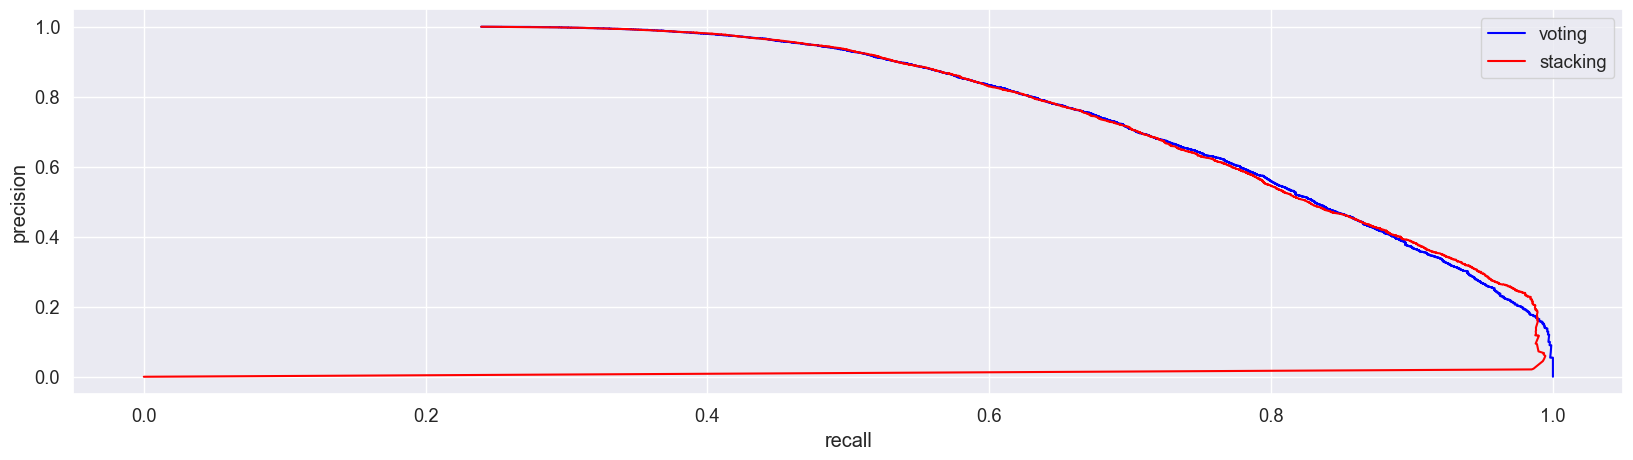

In [184]:
print("Getting Voting Scores")
y_valid_voting_prob = cross_val_predict(voting, X_train_pca, y_train_preprocessed.ravel(), cv=3, method='predict_proba')
print("Getting Stacking Scores")
y_valid_stacking_prob = cross_val_predict(stacking, X_train_pca, y_train_preprocessed.ravel(), cv=3, method='predict_proba')
precision_voting_scores, recall_voting_scores, voting_thresholds = precision_recall_curve(y_train_preprocessed.ravel(), y_valid_voting_prob[:, 1])
precision_stacking_scores, recall_stacking_scores, stacking_thresholds = precision_recall_curve(y_train_preprocessed.ravel(), y_valid_stacking_prob[:, 1])

plt.plot(precision_voting_scores[:-1], recall_voting_scores[:-1], label='voting', color='blue')
plt.plot(precision_stacking_scores[:-1], recall_stacking_scores[:-1], label='stacking', color='red')
plt.legend()
plt.xlabel('recall')
plt.ylabel('precision') # so we can pick threshold at precision = , Recall=

#### Voting is Win

# Test Performance

In [187]:
voting_pipe = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('pca',pca),
    ('model',VotingClassifier(estimators=[
        ("lgbm",LGBMClassifier(objective='binary',n_estimators=200,learning_rate=0.1,num_leaves=345,max_depth=7,random_state=42,class_weight = 'balanced',metric = 'auc')),
        ('xgb',XGBClassifier(objective='binary:logistic',n_estimators=100,learning_rate=0.1,max_depth=7,use_label_encoder=False,eval_metric='logloss',random_state=42 )),
        ('hist',HistGradientBoostingClassifier(random_state=42,max_depth = 10,class_weight='balanced')),
        ('rf',RandomForestClassifier(n_estimators = 1100,max_depth=9,class_weight='balanced',max_samples=2000,random_state=42,n_jobs=-1)),
        ('knn',KNeighborsClassifier(n_neighbors=17,weights='uniform'))
    ],voting='soft'))
])

voting_pipe.fit(X_train,y_train_preprocessed.ravel())

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('workclass_education_occupation_native_country',
                                                  Pipeline(steps=[('handle_nan',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('BinaryEncoder',
                                                                   BinaryEncoder())]),
                                                  ['workclass', 'education',
                                                   'occupation',
                                                   'native_country']),
                                                 ('onh_colm_pib',
                                                  Pipeline(steps=[('handle_nan',
                                                                   SimpleImputer(strategy='mos...
                                                             multi_strategy=None,
                                                             n_estimators=100,
                                                             n_jobs=None,
                                                             num_parallel_tree=None, ...)),
                                              ('hist',
                                               HistGradientBoostingClassifier(class_weight='balanced',
                                                                              max_depth=10,
                                                                              random_state=42)),
                                              ('rf',
                                               RandomForestClassifier(class_weight='balanced',
                                                                      max_depth=9,
                                                                      max_samples=2000,
                                                                      n_estimators=1100,
                                                                      n_jobs=-1,
                                                                      random_state=42)),
                                              ('knn',
                                               KNeighborsClassifier(n_neighbors=17))],
                                  voting='soft'))])

In [188]:
y_test_pred = voting_pipe.predict(X_test)

print(f'Test Accuracy:{accuracy_score(y_test_preprocessed.ravel(),y_test_pred)}')
print(f"Test Precision: {precision_score(y_test_preprocessed.ravel(), y_test_pred)}")
print(f"Test Recall: {recall_score(y_test_preprocessed.ravel(), y_test_pred)}")
print(f"Test F1: {f1_score(y_test_preprocessed.ravel(), y_test_pred)}")
confusion_matrix(y_test_preprocessed.ravel(), y_test_pred)

Test Accuracy:0.8492518958803034
Test Precision: 0.6655185610409491
Test Recall: 0.7444349315068494
Test F1: 0.7027682360072742


array([[6548,  874],
       [ 597, 1739]], dtype=int64)

# Save Model

In [189]:
import joblib

joblib.dump(voting_pipe,'model.pkl')

['target_pipe.pkl']